In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [196]:
# Loading the dataset
Cap=pd.read_csv('24-03-2019.csv')

In [197]:
# Head of the data
Cap.head()

,Year,Country Name,Health Workforce,Healthcare Activities,Adolescent Fertitlity rate(births per 1000 women ages 15-19),"Fertility rate, total (births per woman)",Survival to age 65 Female,Survival to age 65 Male,Survival to age 65 (% of cohort),Infant Mortality,Avg Mortality Rate,"Mortality rate, adult, female","Mortality rate, adult, male",Overall Population,Female Population,Male Population,Population Growth Rate,Age dependency Ratio,Sex Ratio(Male to Female)
0,1960,European Union,NaN,NaN,-0.240377,-0.175933,0.118371,0.040324,0.079347,NaN,-0.275233,-0.285502,-0.264963,0.040191,0.839253,0.622655,-0.542898,-0.162078,0.821584
1,1961,European Union,NaN,NaN,-0.213048,-0.168673,0.156453,0.065586,0.111020,NaN,-0.303875,-0.321378,-0.286372,0.039921,0.854174,0.639082,-0.508897,-0.137044,0.824330
2,1962,European Union,NaN,NaN,-0.187328,-0.171574,0.194690,0.090843,0.142766,NaN,-0.286403,-0.314099,-0.258707,0.041219,0.869780,0.655826,-0.634063,-0.121763,0.826359
3,1963,European Union,NaN,NaN,-0.188559,-0.150098,0.214221,0.102519,0.158370,NaN,-0.290609,-0.324141,-0.257077,0.043544,0.885752,0.672347,-0.607015,-0.112616,0.827480
4,1964,European Union,NaN,NaN,-0.191342,-0.130377,0.233770,0.114194,0.173982,NaN,-0.338486,-0.366055,-0.310918,0.045938,0.901654,0.687978,-0.490586,-0.103209,0.827501


In [198]:
Cap['Country Name'].unique()

array(['European Union', 'Argentina', 'Australia', 'Brazil', 'Canada',
       'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy',
       'Japan', 'Korea, Rep.', 'Mexico', 'Russian Federation',
       'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom',
       'United States'], dtype=object)

# Aggregation of indicators 

In [199]:
# Favourable Indicators for TS forecasting
meanlist=[]
for i in range(len(Cap)):
    templist =[Cap['Health Workforce'][i],Cap['Fertility rate, total (births per woman)'][i],
                Cap['Survival to age 65 (% of cohort)'][i],
               Cap['Overall Population'][i]]
    tempser = pd.Series(templist)
    #print(tempser)
    meanlist.append(tempser.mean())
    #print(meanlist)
    Positive_Indicators=pd.DataFrame(meanlist)
    Positive_Indicators.columns=['Positive Indicators']
    

# Unfavourable Indicators for TS forecasting
meanlist=[]
for i in range(len(Cap)):
    templist =[Cap['Adolescent Fertitlity rate(births per 1000 women ages 15-19)'][i],Cap['Infant Mortality'][i],
               Cap['Avg Mortality Rate'][i],Cap['Population Growth Rate'][i],
                Cap['Age dependency Ratio'][i],Cap['Sex Ratio(Male to Female)'][i]]
    tempser = pd.Series(templist)
    #print(tempser)
    meanlist.append(tempser.mean())
    #print(meanlist)
    Negative_Indicators=pd.DataFrame(meanlist)
    Negative_Indicators.columns=['Negative Indicators']

In [200]:
# Final indicators
coun=Cap[['Year','Country Name']]
final=pd.concat([coun,Positive_Indicators,Negative_Indicators],axis=1)
final.head()

,Year,Country Name,Positive Indicators,Negative Indicators
0,1960,European Union,-0.018798,-0.079800
1,1961,European Union,-0.005911,-0.067707
2,1962,European Union,0.004137,-0.080640
3,1963,European Union,0.017272,-0.074264
4,1964,European Union,0.029848,-0.059224


In [201]:
final.shape

(1120, 4)

In [203]:
final.to_csv('Final.csv',index=False)

# EDA trend plot for the favourable indicators

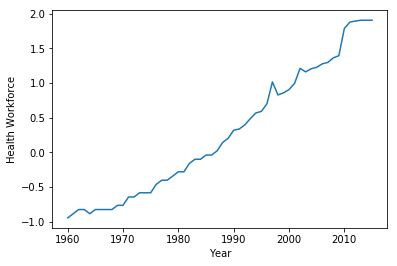

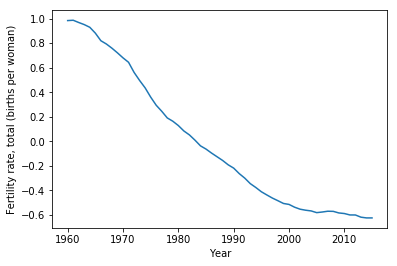

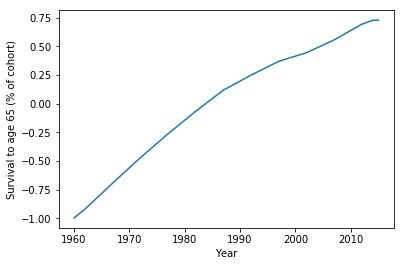

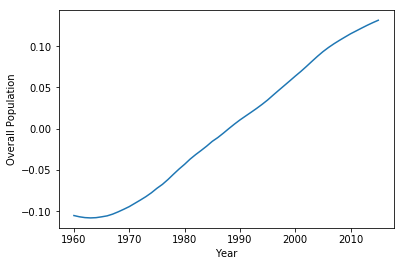

In [8]:
#Trend graph for each individual indicators
a=['Health Workforce','Fertility rate, total (births per woman)','Survival to age 65 (% of cohort)',
  'Overall Population']
import seaborn as sns
for i in a:
        sns.lineplot(Cap.Year,Cap[i],ci=None)
        plt.show()
    

# EDA trend plot for the Unfavourable indicators

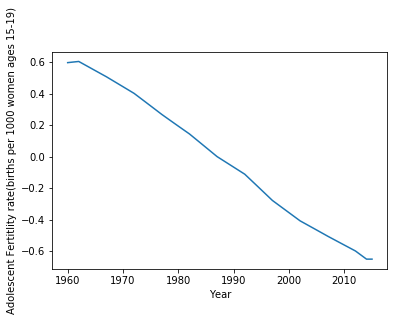

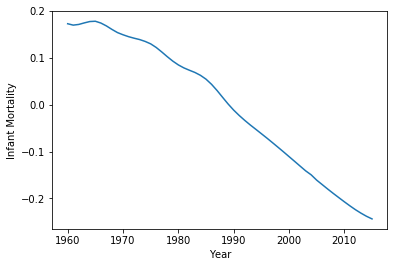

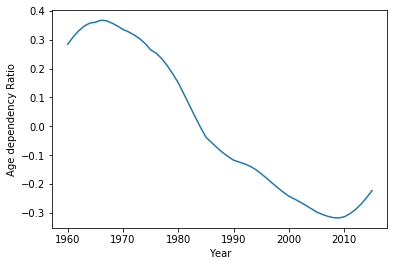

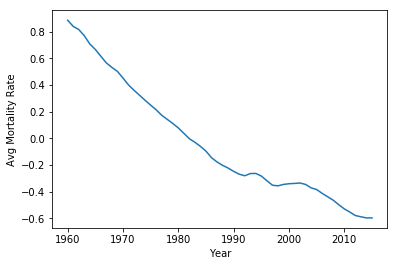

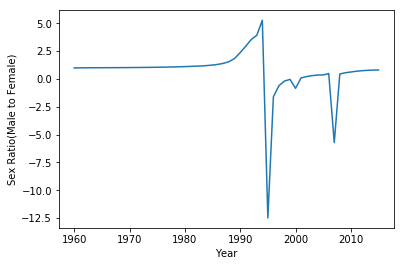

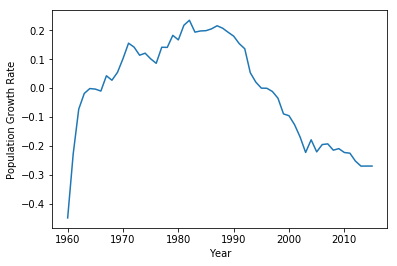

In [9]:
a=['Adolescent Fertitlity rate(births per 1000 women ages 15-19)','Infant Mortality','Age dependency Ratio',
   'Avg Mortality Rate','Sex Ratio(Male to Female)','Population Growth Rate']
import seaborn as sns
for i in a:
        sns.lineplot(Cap.Year,Cap[i],ci=None)
        plt.show()
    

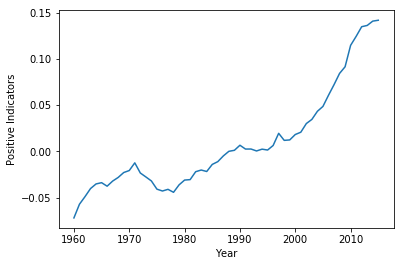

In [10]:
# Aggregated plot for Positive indicators
sns.lineplot(final['Year'],final['Positive Indicators'],ci=None)
plt.show()

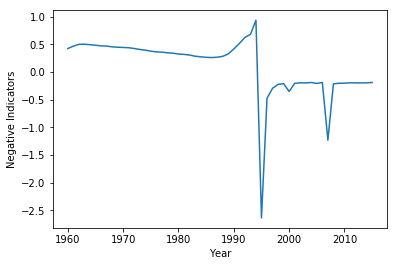

In [11]:
# Trend plot for Negative indicators
sns.lineplot(final['Year'],final['Negative Indicators'],ci=None)
plt.show()

# Time Series forecasting for India 

In [12]:
df=final[final['Country Name']=='India']

date_range=pd.date_range(start='1/1/1960',end='31/12/2015',freq='y')
date_range
df.index=date_range
df.head()


,Year,Country Name,Positive Indicators,Negative Indicators
1960-12-31,1960,India,-0.432078,1.377269
1961-12-31,1961,India,-0.412879,1.390502
1962-12-31,1962,India,-0.395003,1.412906
1963-12-31,1963,India,-0.374281,1.436395
1964-12-31,1964,India,-0.354485,1.456667


In [13]:

df.isnull().sum()

Year                   0
Country Name           0
Positive Indicators    0
Negative Indicators    0
dtype: int64

## Positive Indicator

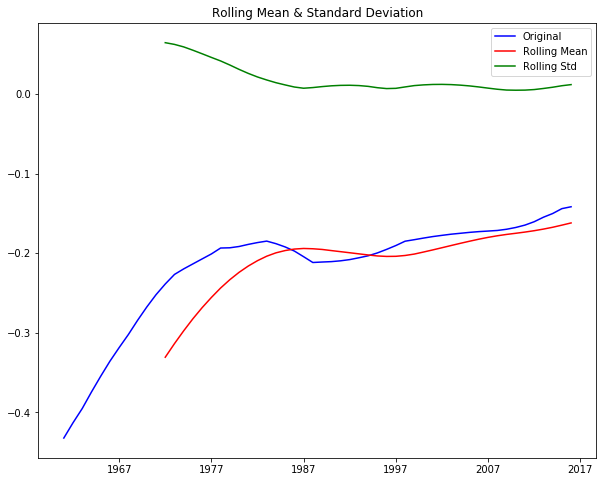

Results of Dickey-Fuller Test:
Test Statistic                 -2.625391
p-value                         0.087862
#Lags Used                      1.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


In [14]:
# Stationarity test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean =timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    plt.figure(figsize=[10,8])
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
ts=df['Positive Indicators']    
test_stationarity(ts)    

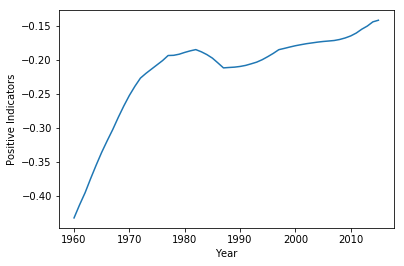

In [15]:
sns.lineplot(df['Year'],df['Positive Indicators'],ci=None)
plt.show()

### Split Data in Training and Test

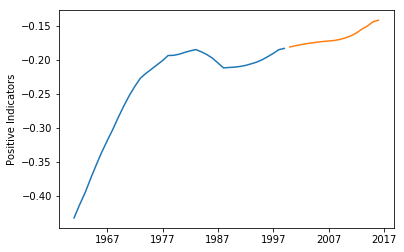

In [16]:
#Creating train and test set 
train=df[0:int(len(df)*0.7)] 
test=df[int(len(df)*0.7):]

type(train)
train.head()

# SImple Plot of Test and train data
sns.lineplot(train.index,train['Positive Indicators'],ci=None)
sns.lineplot(test.index,test['Positive Indicators'],ci=None)
plt.show()



### Decomposition models


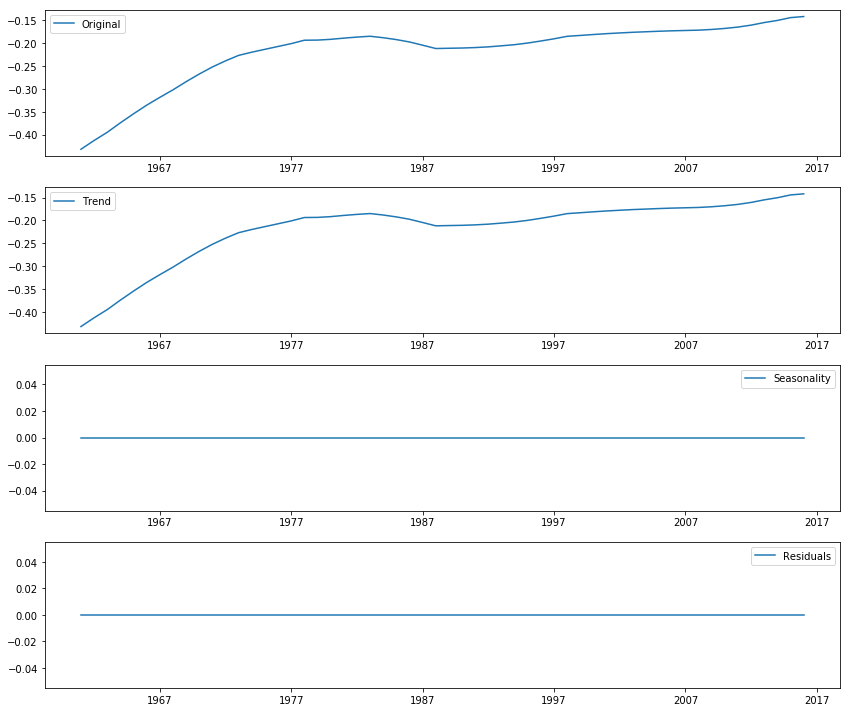

In [17]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=[12,10])
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


### Simple Exponential Smoothing

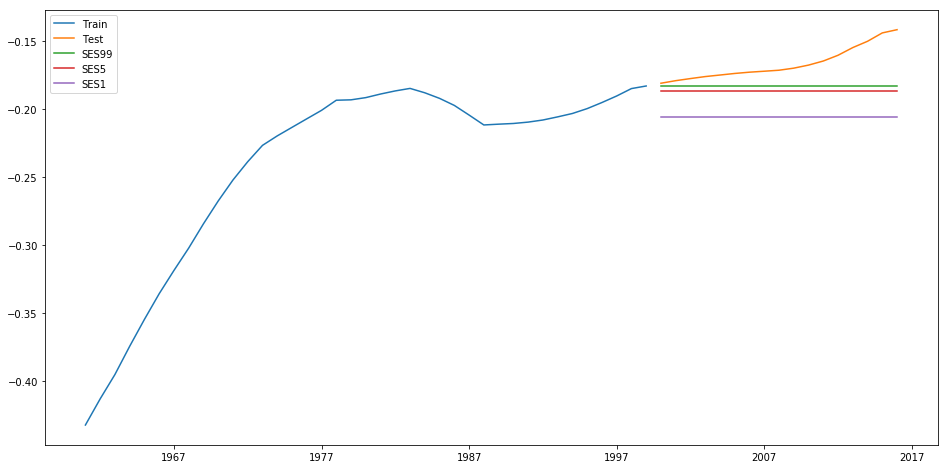

In [18]:


from statsmodels.tsa.holtwinters import  SimpleExpSmoothing, Holt

# create class
model = SimpleExpSmoothing(np.asarray(train['Positive Indicators']))

# fit model
model99_fit = model.fit(smoothing_level=0.99,optimized=False)
model5_fit = model.fit(smoothing_level=0.5,optimized=False)
model1_fit = model.fit(smoothing_level=0.1,optimized=False)

fcst_SES = test.copy()

fcst_SES['SES99'] = model99_fit.forecast(len(test['Positive Indicators']))
fcst_SES['SES5'] = model5_fit.forecast(len(test['Positive Indicators']))
fcst_SES['SES1'] = model1_fit.forecast(len(test['Positive Indicators']))

plt.figure(figsize=(16,8))
plt.plot(train['Positive Indicators'], label='Train')
plt.plot(test['Positive Indicators'], label='Test')
plt.plot(fcst_SES['SES99'], label='SES99')
plt.plot(fcst_SES['SES5'], label='SES5')
plt.plot(fcst_SES['SES1'], label='SES1')
plt.legend(loc='best')

#fcst_SES['SES99']




In [19]:
# MAPE calculation function
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


### Optimum  parameter model

In [20]:

from sklearn.metrics import mean_squared_error
mape=mean_absolute_percentage_error(test['Positive Indicators'],fcst_SES['SES99'])
print('The MAPE value for base model is :',mape)

rmse =np.sqrt(mean_squared_error(test['Positive Indicators'],fcst_SES['SES99']))
print('The RMSE score for base model is:',rmse)

model_opt_fit = model.fit()

model_opt_fit.model.params



The MAPE value for base model is : 10.446158810546834
The RMSE score for base model is: 0.020241103153162538


{'smoothing_level': 0.9752391891850896,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 0.0,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

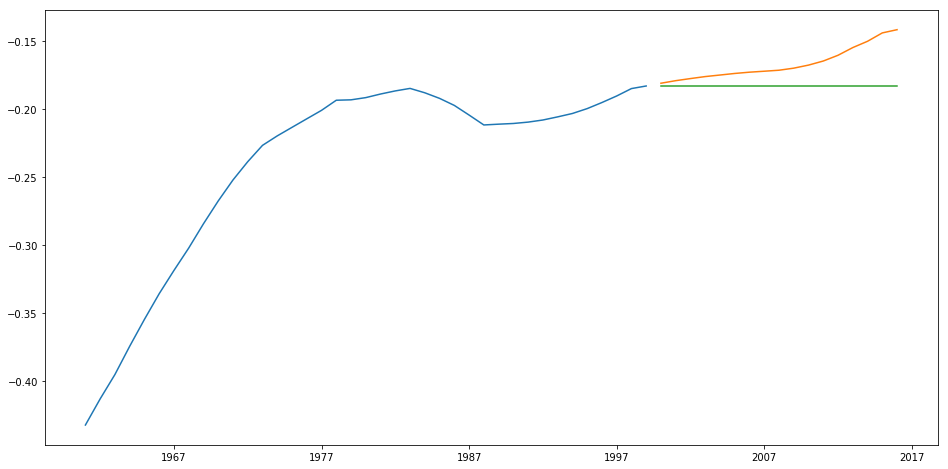

In [21]:
#Optimum Model

model = SimpleExpSmoothing(np.asarray(train['Positive Indicators']))

# fit model
model99_fit = model.fit(smoothing_level=1,optimized=False)
fcst_SES = test.copy()

#train_pred = model99_fit.forecast(len(train['Positive Indicators']))
fcst_SES['test'] = model99_fit.forecast(len(test['Positive Indicators']))



plt.figure(figsize=(16,8))
plt.plot(train['Positive Indicators'], label='Train')
plt.plot(test['Positive Indicators'], label='Test')
#plt.plot(train_pred, label='train forecast')
plt.plot(fcst_SES['test'], label='test forecast')

### Double Exponential (Holt)

In [22]:
# Model declaration
model = Holt(np.asarray(train['Positive Indicators']))
model_fit = model.fit(smoothing_level = 0.9,smoothing_slope = 0.3,optimized=False)
fcst_Holt= test.copy()
fcst_Holt['Holt'] = model_fit.forecast(len(test['Positive Indicators']))

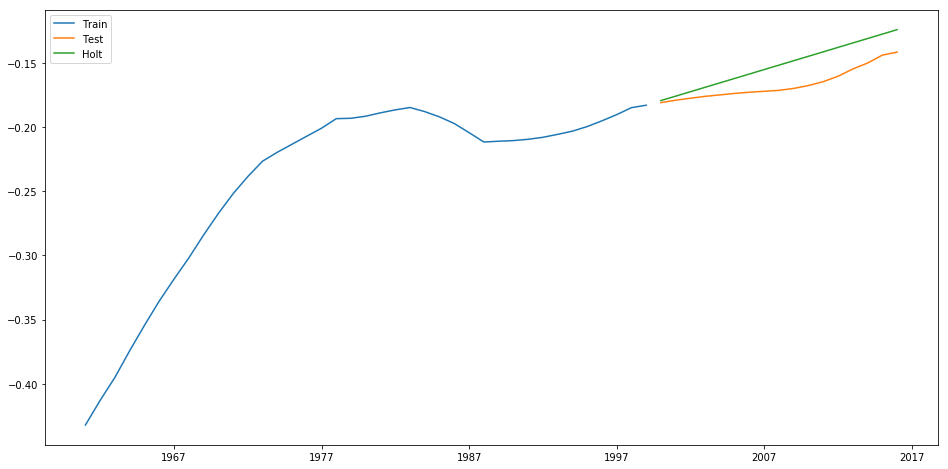

In [23]:
plt.figure(figsize=(16,8))
plt.plot(train['Positive Indicators'], label='Train')
plt.plot(test['Positive Indicators'], label='Test')
plt.plot(fcst_Holt['Holt'], label='Holt')
plt.legend(loc='best')


In [24]:
## Optimum alpha and Beta values

MAPE=[]
a=[]
b=[]
for i in np.arange(0,1,0.1):
    for j in np.arange(0,1,0.1):
        model = Holt(np.asarray(train['Positive Indicators']))
        modelopt_fit=model.fit(smoothing_level=i,smoothing_slope=j)
        fcst_Holt['Opt2'] = modelopt_fit.forecast(len(test['Positive Indicators']))#70-30
        a.append(i)
        b.append(j)
        MAPE.append(mean_absolute_percentage_error(test['Positive Indicators'],fcst_Holt['Opt2'] ))
d=pd.DataFrame({'Alpha':a,'Beta':b,'MAPE':MAPE})

# Finding the alpga and beta with minimum MAPE
m=d.MAPE.min()
d[d.MAPE==m]



,Alpha,Beta,MAPE
81,0.8,0.1,2.131695


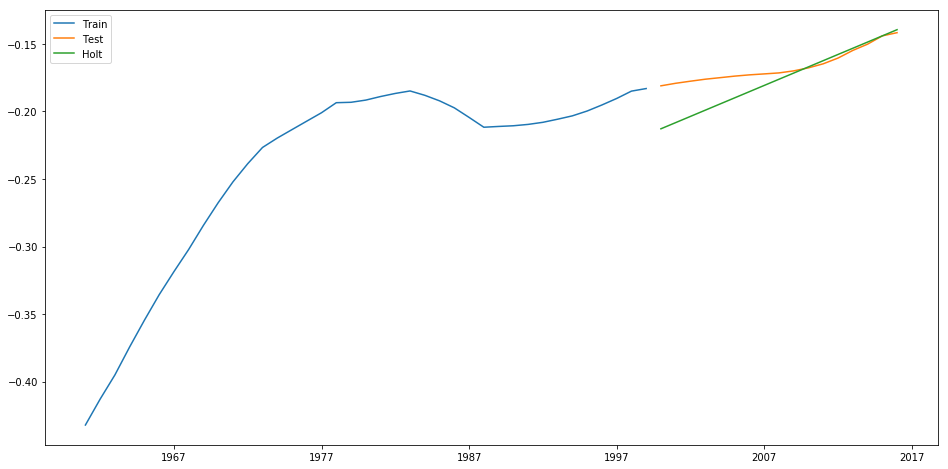

In [25]:
# Model with minimum MAPE
model = Holt(np.asarray(train['Positive Indicators']))
model_fit = model.fit(smoothing_level =0.1,smoothing_slope = 0.5,optimized=False)
fcst_Holt = test.copy()
fcst_Holt['Holt'] = model_fit.forecast(len(test['Positive Indicators']))

#Optimized Holt Model
plt.figure(figsize=(16,8))
plt.plot(train['Positive Indicators'], label='Train')
plt.plot(test['Positive Indicators'], label='Test')
plt.plot(fcst_Holt['Holt'], label='Holt')
plt.legend(loc='best')


### Forecasting the positive indicator for 2016-2020

In [26]:
## Future Forecast with full data for India
model = Holt(np.asarray(df['Positive Indicators']))
model_fit = model.fit(smoothing_level =0.1,smoothing_slope = 0.5,optimized=False)


fct=model_fit.forecast(5)
print("The forcasted value for 5 years is:\n\n",fct)

The forcasted value for 5 years is:

 [-0.14435944 -0.14399778 -0.14363613 -0.14327447 -0.14291282]


In [27]:
# Creating new dataframe to combine both old data and new forecasted data
old=pd.DataFrame({'Time':df.Year,'Postive Indicator':df['Positive Indicators']})
time=pd.date_range(start='1/1/2016',end='31/12/2020',freq='y')
print(time)
new_time=[2016,2017,2018,2019,2020]
new=pd.DataFrame({'Time':new_time,'Postive Indicator':fct})
new.index=time
print(old.shape)
print(new.shape)

final=pd.DataFrame(pd.concat([old,new],axis=0))
final.head()

DatetimeIndex(['2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')
(56, 2)
(5, 2)


,Time,Postive Indicator
1960-12-31,1960,-0.432078
1961-12-31,1961,-0.412879
1962-12-31,1962,-0.395003
1963-12-31,1963,-0.374281
1964-12-31,1964,-0.354485


In [28]:
final.tail()

,Time,Postive Indicator
2016-12-31,2016,-0.144359
2017-12-31,2017,-0.143998
2018-12-31,2018,-0.143636
2019-12-31,2019,-0.143274
2020-12-31,2020,-0.142913


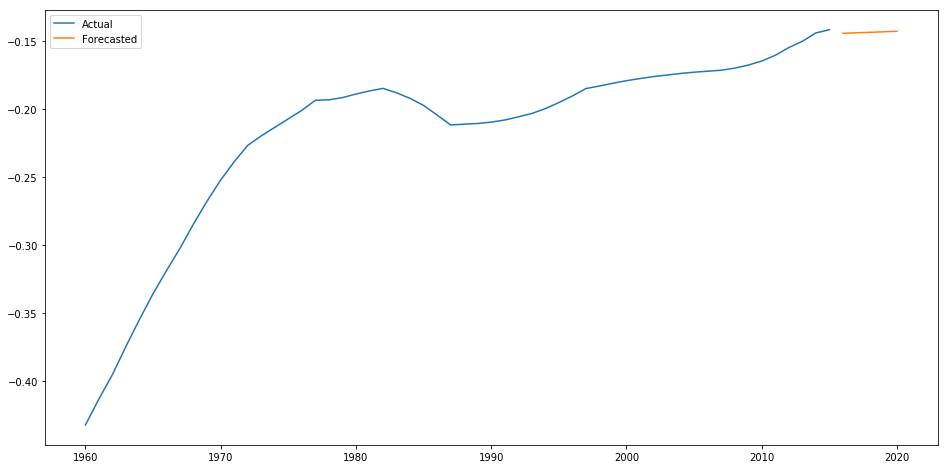

In [29]:
# Forecasted plot for India Positive Indicator
plt.figure(figsize=(16,8))
plt.plot(old.Time,old['Postive Indicator'],label='Actual')
plt.plot(new.Time,new['Postive Indicator'],label='Forecasted')
plt.legend(loc='best')

### ARIMA Model
 Steps for ARIMA implementation.The general steps to implement an ARIMA model are –

- **Load the data**: The first step for model building is of course to load the dataset
- **Preprocessing**: Depending on the dataset, the steps of preprocessing will be defined. This will include creating timestamps, converting the dtype of date/time column, making the series univariate, etc.
- **Make series stationary**: In order to satisfy the assumption, it is necessary to make the series stationary. This would include checking the stationarity of the series and performing required transformations
- **Determine d value**: For making the series stationary, the number of times the difference operation was performed will be taken as the d value
- **Create ACF and PACF plots**: This is the most important step in ARIMA implementation. ACF PACF plots are used to determine the input parameters for our ARIMA model
- **Determine the p and q values**: Read the values of p and q from the plots in the previous step
- **Fit ARIMA model**: Using the processed data and parameter values we calculated from the previous steps, fit the ARIMA model
- **Predict values on validation set**: Predict the future values
- **Calculate RMSE**: To check the performance of the model, check the RMSE value using the predictions and actual values on the validation set

# Positive Indicators

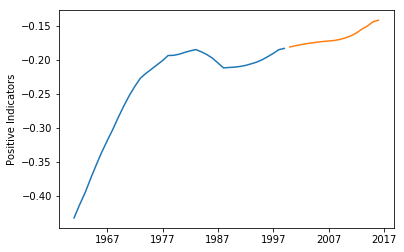

In [30]:
#Creating train and test set 
train=df[0:int(len(df)*0.7)] 
test=df[int(len(df)*0.7):]

type(train)
train.head()

# SImple Plot of Test and train data
sns.lineplot(train.index,train['Positive Indicators'],ci=None)
sns.lineplot(test.index,test['Positive Indicators'],ci=None)
plt.show()



In [31]:
ts=df['Positive Indicators'] 

C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array inde

Text(0.5,1,'RSS: nan')

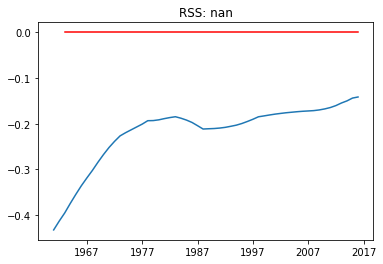

In [32]:
# ARIMA model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts, order=(0, 2, 0)) 
results_ARIMA = model.fit()  
plt.plot(ts)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts)**2))

In [33]:
# ARIMA model summary
results_ARIMA.summary()

C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array inde

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARIMA Model Results                                
==================================================================================
Dep. Variable:     D2.Positive Indicators   No. Observations:                   54
Model:                     ARIMA(0, 2, 0)   Log Likelihood                 256.739
Method:                               css   S.D. of innovations              0.002
Date:                    Mon, 01 Apr 2019   AIC                           -509.477
Time:                            21:41:13   BIC                           -505.499
Sample:                        12-31-1962   HQIC                          -507.943
                             - 12-31-2015                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.000     -1.099      0.277      -0.001       0.000
==============================================================================
"""

In [34]:
# Predicting the values for Training part

pred=results_ARIMA.predict()
print(len(pred))
df['Forecasted_Positive_Indicator']=pred
#df.drop('Forecasted',axis=1,inplace=True)
df

54


C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array inde

,Year,Country Name,Positive Indicators,Negative Indicators,Forecasted_Positive_Indicator
1960-12-31,1960,India,-0.432078,1.377269,NaN
1961-12-31,1961,India,-0.412879,1.390502,NaN
1962-12-31,1962,India,-0.395003,1.412906,-0.000312
1963-12-31,1963,India,-0.374281,1.436395,-0.000312
1964-12-31,1964,India,-0.354485,1.456667,-0.000312
1965-12-31,1965,India,-0.335632,1.468960,-0.000312
1966-12-31,1966,India,-0.318565,1.476121,-0.000312
1967-12-31,1967,India,-0.302145,1.474947,-0.000312
1968-12-31,1968,India,-0.284275,1.469067,-0.000312
1969-12-31,1969,India,-0.267523,1.462609,-0.000312


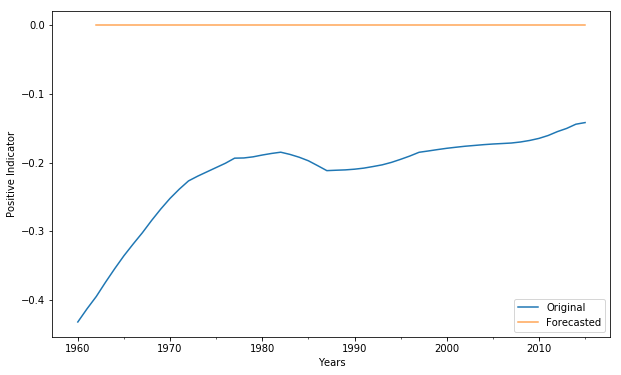

In [35]:
axis = df['Positive Indicators'].plot(label='Original', figsize=(10, 6))
#df['Positive Indicators'].plot(ax=axis, label='Test', alpha=0.7)
df['Forecasted_Positive_Indicator'].plot(ax=axis, label='Forecasted', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Positive Indicator')
plt.legend(loc='best')
plt.show()
plt.close()

In [36]:
forecast=results_ARIMA.forecast(steps=5,alpha=0.95)
LI=[]
UI=[]
for i in forecast[2]:
    LI.append(i[0])
    UI.append(i[1])

C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


In [37]:
df_new=pd.DataFrame({'Forecast 2016-2020':forecast[0],'Standard Error':forecast[1],'CI lower':LI,'CI Upper':UI})

time=pd.date_range(start='1/1/2016',end='31/12/2020',freq='y')
df_new.index=time
df_new

,Forecast 2016-2020,Standard Error,CI lower,CI Upper
2016-12-31,-0.139673,0.002084,-0.139804,-0.139542
2017-12-31,-0.137929,0.004660,-0.138221,-0.137637
2018-12-31,-0.136497,0.007798,-0.136986,-0.136008
2019-12-31,-0.135376,0.011416,-0.136092,-0.134660
2020-12-31,-0.134567,0.015457,-0.135536,-0.133598


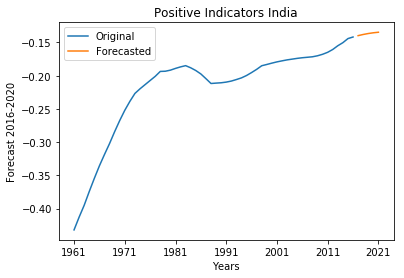

In [38]:
sns.lineplot(df.index,df['Positive Indicators'],ci=None,label='Original')
sns.lineplot(df_new.index,df_new['Forecast 2016-2020'],ci=None,label='Forecasted')
plt.title('Positive Indicators India')
plt.xlabel('Years')
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import  accuracy_score

# MAPE calculation function
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100




In [40]:
MAPE=[]
RMSE=[]

# Simple Exponenetial model
mape=mean_absolute_percentage_error(test['Positive Indicators'],fcst_SES['test'])
MAPE.append(mape)
print('The MAPE value for SES model is :',mape)

rmse =np.sqrt(mean_squared_error(test['Positive Indicators'],fcst_SES['test']))
RMSE.append(rmse)
print('The RMSE score for SES model is:',rmse)

# Double Exponenetial model
mape=mean_absolute_percentage_error(test['Positive Indicators'],fcst_Holt['Holt'] )
MAPE.append(mape)
print('The MAPE value for DES model is :',mape)

rmse =np.sqrt(mean_squared_error(test['Positive Indicators'],fcst_Holt['Holt']))
RMSE.append(rmse)
print('The RMSE score for DES model is:',rmse)

# ARIMA
# Compute the root mean square error
mape=mean_absolute_percentage_error(df['Positive Indicators'][2:],df['Forecasted_Positive_Indicator'][2:])
MAPE.append(mape)
print('The MAPE value for ARIMA model is :',mape)
mse = ((df['Positive Indicators'][2:] - df['Forecasted_Positive_Indicator'][2:]) ** 2).mean()
rmse = np.sqrt(mse)
print('The RMSE value for ARIMA model is :',rmse)
RMSE.append(rmse)


The MAPE value for SES model is : 10.434336495392278
The RMSE score for SES model is: 0.020225210973672067
The MAPE value for DES model is : 6.165002060913902
The RMSE score for DES model is: 0.015290371992328038
The MAPE value for ARIMA model is : 99.84370911740112
The RMSE value for ARIMA model is : 0.2173991318315316


In [41]:
MAPE


[10.434336495392278, 6.165002060913902, 99.84370911740112]

In [42]:
Country=['India','India','India']
Models=['SES','DES','Auto ARIMA']
Indicators=['Positive Indicators','Positive Indicators','Positive Indicators']

In [43]:
Eval_Metrices_India_Pos=pd.DataFrame({'Country Name':Country,'Model Name':Models,'Indicator Name':Indicators,'Test MAPE':MAPE,'Test RMSE':RMSE,
                                 })
Eval_Metrices_India_Pos

,Country Name,Model Name,Indicator Name,Test MAPE,Test RMSE
0,India,SES,Positive Indicators,10.434336,0.020225
1,India,DES,Positive Indicators,6.165002,0.015290
2,India,Auto ARIMA,Positive Indicators,99.843709,0.217399


## Negative Indicator

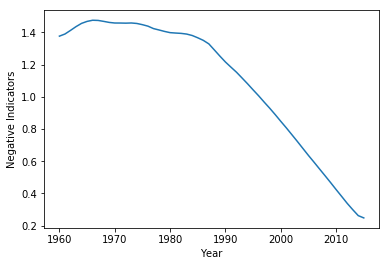

In [44]:
sns.lineplot(df['Year'],df['Negative Indicators'],ci=None)
plt.show()

### Split Data in Training and Test

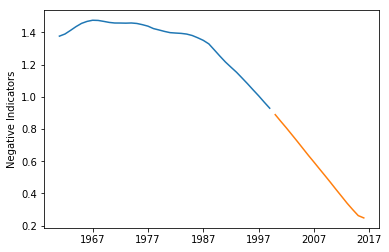

In [45]:
#Creating train and test set 
train=df[0:int(len(df)*0.7)] 
test=df[int(len(df)*0.7):]

type(train)
train.head()

# SImple Plot of Test and train data
sns.lineplot(train.index,train['Negative Indicators'],ci=None)
sns.lineplot(test.index,test['Negative Indicators'],ci=None)
plt.show()



### Decomposition models


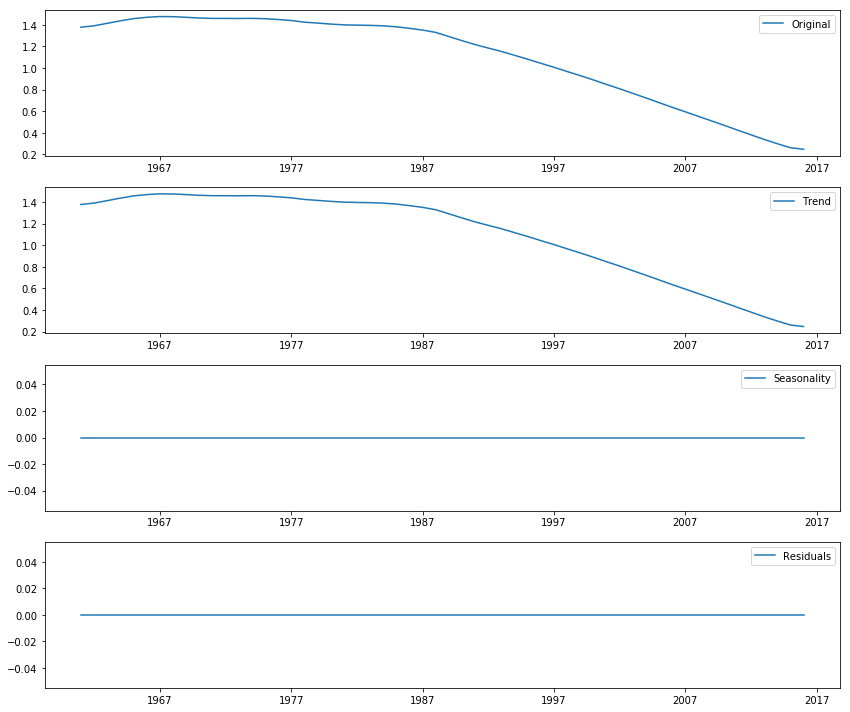

In [46]:
ts=df['Negative Indicators']
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=[12,10])
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


### Simple Exponential Smoothing

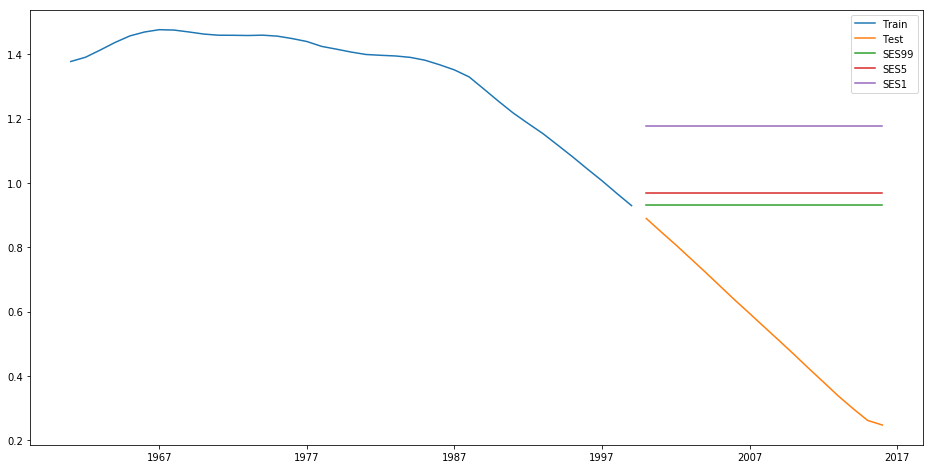

In [47]:


from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

# create class
model = SimpleExpSmoothing(np.asarray(train['Negative Indicators']))

# fit model
model99_fit = model.fit(smoothing_level=0.99,optimized=False)
model5_fit = model.fit(smoothing_level=0.5,optimized=False)
model1_fit = model.fit(smoothing_level=0.1,optimized=False)

fcst_SES = test.copy()

fcst_SES['SES99'] = model99_fit.forecast(len(test['Negative Indicators']))
fcst_SES['SES5'] = model5_fit.forecast(len(test['Negative Indicators']))
fcst_SES['SES1'] = model1_fit.forecast(len(test['Negative Indicators']))

plt.figure(figsize=(16,8))
plt.plot(train['Negative Indicators'], label='Train')
plt.plot(test['Negative Indicators'], label='Test')
plt.plot(fcst_SES['SES99'], label='SES99')
plt.plot(fcst_SES['SES5'], label='SES5')
plt.plot(fcst_SES['SES1'], label='SES1')
plt.legend(loc='best')

#fcst_SES['SES99']




In [48]:
#
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


### Optimum  parameter model

In [49]:

from sklearn.metrics import mean_squared_error
mape=mean_absolute_percentage_error(test['Negative Indicators'],fcst_SES['SES99'])
print('The MAPE value for base model is :',mape)

rmse =np.sqrt(mean_squared_error(test['Negative Indicators'],fcst_SES['SES99']))
print('The RMSE score for base model is:',rmse)

model_opt_fit = model.fit()

model_opt_fit.model.params



The MAPE value for base model is : 97.10564220220402
The RMSE score for base model is: 0.427464094194841


{'smoothing_level': 1.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 1.3772693194999999,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

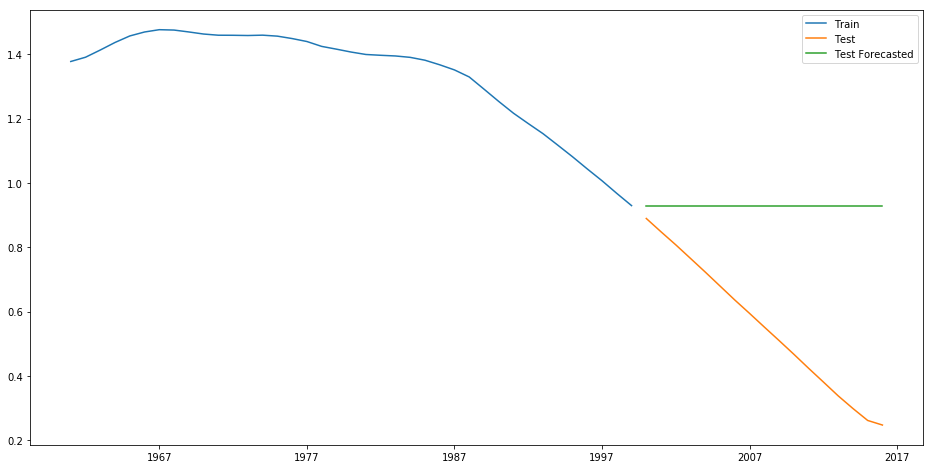

In [50]:
# create class
model = SimpleExpSmoothing(np.asarray(train['Negative Indicators']))

# fit model
model99_fit = model.fit(smoothing_level=1,optimized=False)
fcst_SES = test.copy()
fcst_SES['test_1'] = model99_fit.forecast(len(test['Negative Indicators']))

plt.figure(figsize=(16,8))
plt.plot(train['Negative Indicators'], label='Train')
plt.plot(test['Negative Indicators'], label='Test')
plt.plot(fcst_SES['test_1'], label='Test Forecasted')
plt.legend()
plt.show()

### Double Exponential (Holt)

In [51]:
model = Holt(np.asarray(train['Negative Indicators']))
model_fit = model.fit(smoothing_level = 0.9,smoothing_slope = 0.3,optimized=False)
fcst_Holt = test.copy()
fcst_Holt['Holt_1'] = model_fit.forecast(len(test['Negative Indicators']))


In [52]:
model_fit.fittedvalues

array([1.39050209, 1.38825252, 1.40054444, 1.425275  , 1.45189051,
       1.47408654, 1.48598502, 1.4909574 , 1.48607536, 1.47570264,
       1.46531809, 1.45924602, 1.45831986, 1.45751246, 1.45880759,
       1.4554696 , 1.44651721, 1.43540695, 1.4176453 , 1.40757971,
       1.39817952, 1.39067538, 1.38926014, 1.38862289, 1.38507588,
       1.37568378, 1.3596194 , 1.34133678, 1.31655696, 1.27316297,
       1.22899682, 1.18823901, 1.15420823, 1.1221345 , 1.08548522,
       1.04816733, 1.00906637, 0.97130494, 0.9311211 ])

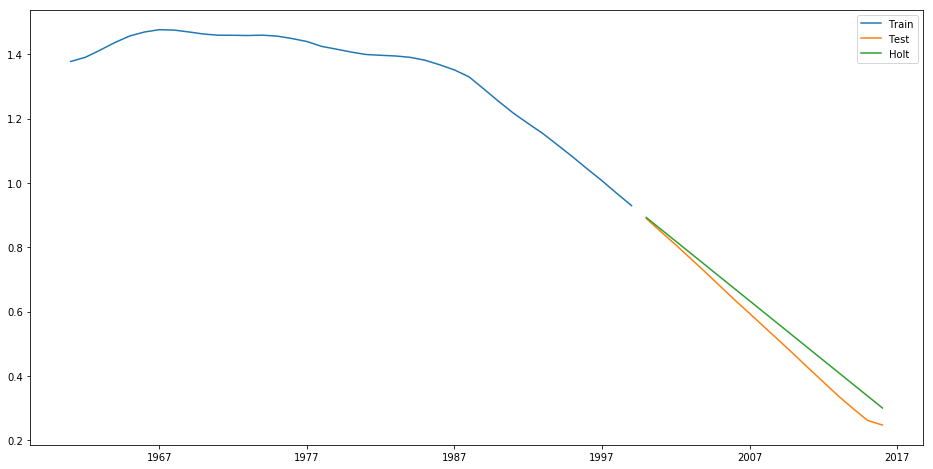

In [53]:
plt.figure(figsize=(16,8))
plt.plot(train['Negative Indicators'], label='Train')
plt.plot(test['Negative Indicators'], label='Test')
plt.plot(fcst_Holt['Holt_1'], label='Holt')
plt.legend(loc='best')


In [54]:
## New alpha and Beta values

MAPE=[]
a=[]
b=[]
for i in np.arange(0,1,0.1):
    for j in np.arange(0,1,0.1):
        model = Holt(np.asarray(train['Negative Indicators']))
        modelopt_fit=model.fit(smoothing_level=i,smoothing_slope=j)
        fcst_Holt['Opt2'] = modelopt_fit.forecast(len(test['Negative Indicators']))#70-30
        a.append(i)
        b.append(j)
        MAPE.append(mean_absolute_percentage_error(test['Negative Indicators'],fcst_Holt['Opt2'] ))
d=pd.DataFrame({'Alpha':a,'Beta':b,'MAPE':MAPE})


m=d.MAPE.min()
d[d.MAPE==m]



,Alpha,Beta,MAPE
26,0.2,0.6,2.12902


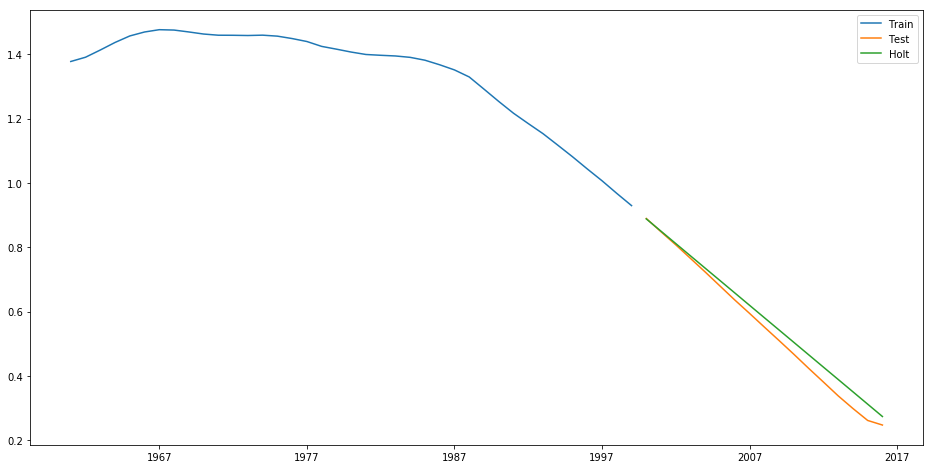

In [55]:
# Model with minimum MAPE
model = Holt(np.asarray(train['Negative Indicators']))
model_fit = model.fit(smoothing_level =0.3,smoothing_slope = 0.5,optimized=False)
fcst_Holt = test.copy()
fcst_Holt['Holt_1'] = model_fit.forecast(len(test['Negative Indicators']))


plt.figure(figsize=(16,8))
plt.plot(train['Negative Indicators'], label='Train')
plt.plot(test['Negative Indicators'], label='Test')
plt.plot(fcst_Holt['Holt_1'], label='Holt')
plt.legend(loc='best')


### Forecasting the Negative indicator for 2016-2020

In [56]:
## Future Forecast with full data for India
model = Holt(np.asarray(df['Negative Indicators']))
model_fit = model.fit(smoothing_level =0.3,smoothing_slope = 0.5,optimized=False)


fct=model_fit.forecast(5)
print("The forcasted value for 5 years is:\n\n",fct)

The forcasted value for 5 years is:

 [0.18831705 0.15209884 0.11588063 0.07966242 0.0434442 ]


In [57]:
# Creating new dataframe to combine both old data and new forecasted data
old=pd.DataFrame({'Time':df.Year,'Negative Indicator':df['Negative Indicators']})
time=pd.date_range(start='1/1/2016',end='31/12/2020',freq='y')
print(time)
new_time=[2016,2017,2018,2019,2020]
new=pd.DataFrame({'Time':new_time,'Negative Indicator':fct})
new.index=time
print(old.shape)
print(new.shape)

final=pd.DataFrame(pd.concat([old,new],axis=0))
final.head()

DatetimeIndex(['2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')
(56, 2)
(5, 2)


,Time,Negative Indicator
1960-12-31,1960,1.377269
1961-12-31,1961,1.390502
1962-12-31,1962,1.412906
1963-12-31,1963,1.436395
1964-12-31,1964,1.456667


In [58]:
final.tail()

,Time,Negative Indicator
2016-12-31,2016,0.188317
2017-12-31,2017,0.152099
2018-12-31,2018,0.115881
2019-12-31,2019,0.079662
2020-12-31,2020,0.043444


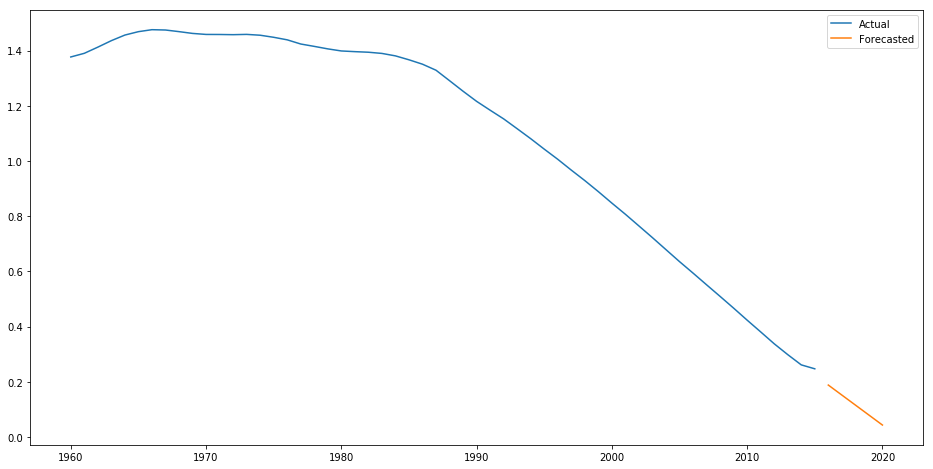

In [59]:
# Forecasted plot for India Negative Indicator
plt.figure(figsize=(16,8))
plt.plot(old.Time,old['Negative Indicator'],label='Actual')
plt.plot(new.Time,new['Negative Indicator'],label='Forecasted')
plt.legend(loc='best')

### ARIMA Model


# Negative Indicators

In [60]:
ts=df['Negative Indicators']

C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array inde

Text(0.5,1,'RSS: nan')

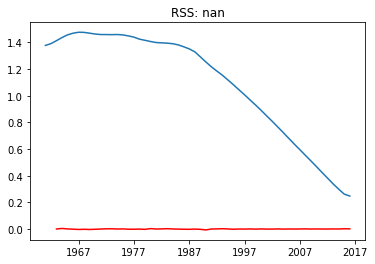

In [61]:
# ARIMA model
model = ARIMA(ts, order=(1, 2, 0)) 
results_ARIMA = model.fit()  
plt.plot(ts)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts)**2))

In [62]:
# ARIMA model summary
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARIMA Model Results                                
==================================================================================
Dep. Variable:     D2.Negative Indicators   No. Observations:                   54
Model:                     ARIMA(1, 2, 0)   Log Likelihood                 211.503
Method:                           css-mle   S.D. of innovations              0.005
Date:                    Mon, 01 Apr 2019   AIC                           -417.006
Time:                            21:41:17   BIC                           -411.039
Sample:                        12-31-1962   HQIC                          -414.704
                             - 12-31-2015                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -4.843e-05      0.001     -0.041      0.968      -0.002       0.002
ar.L1.D2.Negative Indicators     0.4355      0.172      2.528      0.015       0.098       0.773
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2962           +0.0000j            2.2962            0.0000
-----------------------------------------------------------------------------
"""

In [63]:
ts.head()

1960-12-31    1.377269
1961-12-31    1.390502
1962-12-31    1.412906
1963-12-31    1.436395
1964-12-31    1.456667
Freq: A-DEC, Name: Negative Indicators, dtype: float64

In [64]:
# Predicting the values for Training part
pred=results_ARIMA.predict()
print(len(pred))
df['Forecasted_Negative_Indicator']=pred
#df.drop('Forecasted',axis=1,inplace=True)
df

54


,Year,Country Name,Positive Indicators,Negative Indicators,Forecasted_Positive_Indicator,Forecasted_Negative_Indicator
1960-12-31,1960,India,-0.432078,1.377269,NaN,NaN
1961-12-31,1961,India,-0.412879,1.390502,NaN,NaN
1962-12-31,1962,India,-0.395003,1.412906,-0.000312,-0.000048
1963-12-31,1963,India,-0.374281,1.436395,-0.000312,0.003967
1964-12-31,1964,India,-0.354485,1.456667,-0.000312,0.000445
1965-12-31,1965,India,-0.335632,1.468960,-0.000312,-0.001428
1966-12-31,1966,India,-0.318565,1.476121,-0.000312,-0.003502
1967-12-31,1967,India,-0.302145,1.474947,-0.000312,-0.002262
1968-12-31,1968,India,-0.284275,1.469067,-0.000312,-0.003658
1969-12-31,1969,India,-0.267523,1.462609,-0.000312,-0.002077


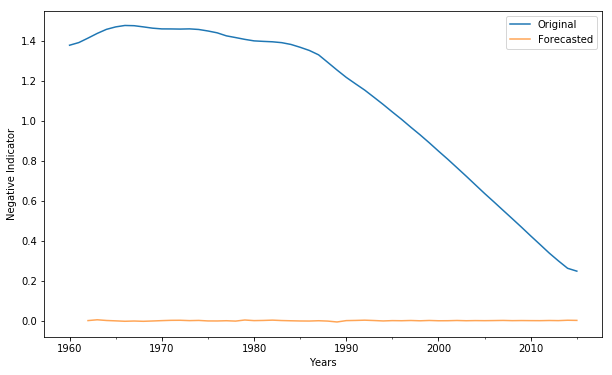

In [65]:
axis = df['Negative Indicators'].plot(label='Original', figsize=(10, 6))
#df['Positive Indicators'].plot(ax=axis, label='Test', alpha=0.7)
df['Forecasted_Negative_Indicator'].plot(ax=axis, label='Forecasted', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Negative Indicator')
plt.legend(loc='best')
plt.show()
plt.close()

In [66]:
forecast=results_ARIMA.forecast(steps=5,alpha=0.95)
LI=[]
UI=[]
for i in forecast[2]:
    LI.append(i[0])
    UI.append(i[1])

In [67]:
df_new=pd.DataFrame({'Forecast 2016-2020':forecast[0],'Standard Error':forecast[1],'CI lower':LI,'CI Upper':UI})

time=pd.date_range(start='1/1/2016',end='31/12/2020',freq='y')
df_new.index=time
df_new

,Forecast 2016-2020,Standard Error,CI lower,CI Upper
2016-12-31,0.242937,0.004807,0.242635,0.243238
2017-12-31,0.242979,0.012657,0.242186,0.243773
2018-12-31,0.244874,0.023265,0.243415,0.246333
2019-12-31,0.247547,0.036198,0.245277,0.249817
2020-12-31,0.250532,0.051132,0.247326,0.253739


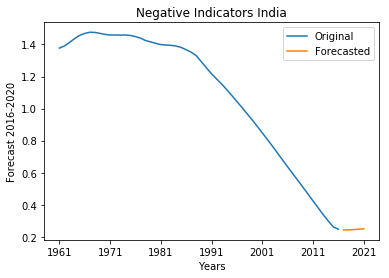

In [68]:
sns.lineplot(df.index,df['Negative Indicators'],ci=None,label='Original')
sns.lineplot(df_new.index,df_new['Forecast 2016-2020'],ci=None,label='Forecasted')
plt.title('Negative Indicators India')
plt.xlabel('Years')
plt.legend()
plt.show()

In [69]:
MAPE=[]
RMSE=[]

# Simple Exponenetial model
mape=mean_absolute_percentage_error(test['Negative Indicators'],fcst_SES['test_1'])
MAPE.append(mape)
print('The MAPE value for SES model is :',mape)

rmse =np.sqrt(mean_squared_error(test['Negative Indicators'],fcst_SES['test_1']))
RMSE.append(rmse)
print('The RMSE score for SES model is:',rmse)

# Double Exponenetial model
mape=mean_absolute_percentage_error(test['Negative Indicators'],fcst_Holt['Holt_1'] )
MAPE.append(mape)
print('The MAPE value for DES model is :',mape)

rmse =np.sqrt(mean_squared_error(test['Negative Indicators'],fcst_Holt['Holt_1']))
RMSE.append(rmse)
print('The RMSE score for DES model is:',rmse)

# ARIMA
# Compute the root mean square error
mape=mean_absolute_percentage_error(df['Negative Indicators'][2:],df['Forecasted_Negative_Indicator'][2:])
MAPE.append(mape)
print('The MAPE value for ARIMA model is :',mape)
mse = ((df['Negative Indicators'][2:] - df['Forecasted_Negative_Indicator'][2:]) ** 2).mean()
rmse = np.sqrt(mse)
print('The RMSE value for ARIMA model is :',rmse)
RMSE.append(rmse)


The MAPE value for SES model is : 97.024320826469
The RMSE score for SES model is: 0.427127087175742
The MAPE value for DES model is : 6.943918850680719
The RMSE score for DES model is: 0.031997028649061766
The MAPE value for ARIMA model is : 100.02151796996668
The RMSE value for ARIMA model is : 1.1604155614914566


In [70]:
Country=['India','India','India']
Models=['SES','DES','ARIMA']
Indicators=['Negative Indicators','Negative Indicators','Negative Indicators']

Eval_Metrices_India_Neg=pd.DataFrame({'Country Name':Country,'Model Name':Models,'Indicator Name':Indicators,'Test MAPE':MAPE,'Test RMSE':RMSE,
                                 })
Eval_Metrices_India_Neg

,Country Name,Model Name,Indicator Name,Test MAPE,Test RMSE
0,India,SES,Negative Indicators,97.024321,0.427127
1,India,DES,Negative Indicators,6.943919,0.031997
2,India,ARIMA,Negative Indicators,100.021518,1.160416


In [71]:
Eval_Metrices_India=pd.concat([Eval_Metrices_India_Pos,Eval_Metrices_India_Neg],axis=0)
Eval_Metrices_India

,Country Name,Model Name,Indicator Name,Test MAPE,Test RMSE
0,India,SES,Positive Indicators,10.434336,0.020225
1,India,DES,Positive Indicators,6.165002,0.015290
2,India,Auto ARIMA,Positive Indicators,99.843709,0.217399
0,India,SES,Negative Indicators,97.024321,0.427127
1,India,DES,Negative Indicators,6.943919,0.031997
2,India,ARIMA,Negative Indicators,100.021518,1.160416


In [72]:
Eval_Metrices_India.to_csv('Model_India.csv',index=False)

# Time Series  Forecasting for United States

In [73]:
# Final indicators
coun=Cap[['Year','Country Name']]
final=pd.concat([coun,Positive_Indicators,Negative_Indicators],axis=1)
final.head()

,Year,Country Name,Positive Indicators,Negative Indicators
0,1960,European Union,-0.018798,-0.079800
1,1961,European Union,-0.005911,-0.067707
2,1962,European Union,0.004137,-0.080640
3,1963,European Union,0.017272,-0.074264
4,1964,European Union,0.029848,-0.059224


In [74]:
df=final[final['Country Name']=='United States']

date_range=pd.date_range(start='1/1/1960',end='31/12/2015',freq='y')
date_range
df.index=date_range
df.head()


,Year,Country Name,Positive Indicators,Negative Indicators
1960-12-31,1960,United States,0.143233,0.319419
1961-12-31,1961,United States,0.137721,0.343362
1962-12-31,1962,United States,0.106158,0.315122
1963-12-31,1963,United States,0.077423,0.287676
1964-12-31,1964,United States,0.051822,0.267723


In [75]:
df.columns

Index(['Year', 'Country Name', 'Positive Indicators', 'Negative Indicators'], dtype='object')

In [76]:
df.tail()

,Year,Country Name,Positive Indicators,Negative Indicators
2011-12-31,2011,United States,0.136379,-0.215925
2012-12-31,2012,United States,0.137645,-0.221879
2013-12-31,2013,United States,0.138323,-0.231906
2014-12-31,2014,United States,0.144641,-0.236356
2015-12-31,2015,United States,0.145516,-0.227997


In [77]:
df.isnull().sum()

Year                   0
Country Name           0
Positive Indicators    0
Negative Indicators    0
dtype: int64

# Positive Indicator

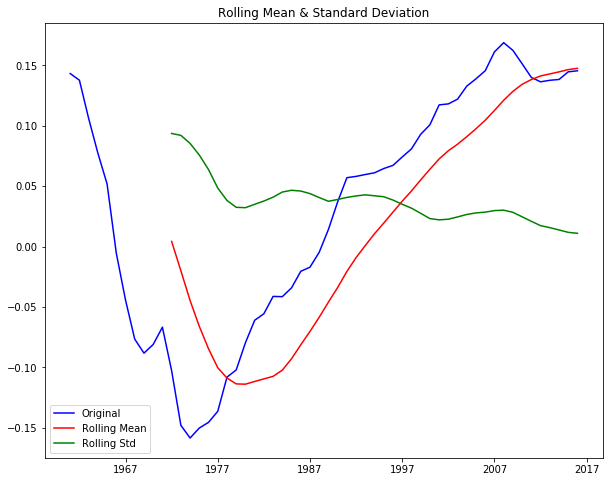

Results of Dickey-Fuller Test:
Test Statistic                 -1.076607
p-value                         0.724310
#Lags Used                      2.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


In [78]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean =timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    plt.figure(figsize=[10,8])
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
ts=df['Positive Indicators']    
test_stationarity(ts)    

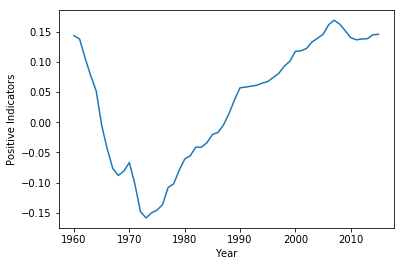

In [79]:
sns.lineplot(df['Year'],df['Positive Indicators'],ci=None)
plt.show()

# Splitting data into Train and Test

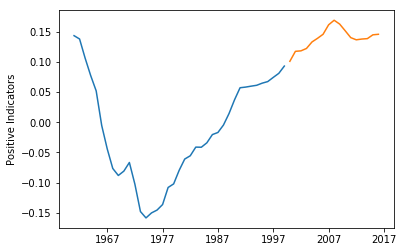

In [80]:
#Creating train and test set 
train=df[0:int(len(df)*0.7)] 
test=df[int(len(df)*0.7):]

type(train)
train.head()

# SImple Plot of Test and train data
sns.lineplot(train.index,train['Positive Indicators'],ci=None)
sns.lineplot(test.index,test['Positive Indicators'],ci=None)
plt.show()



# Decomposition Model

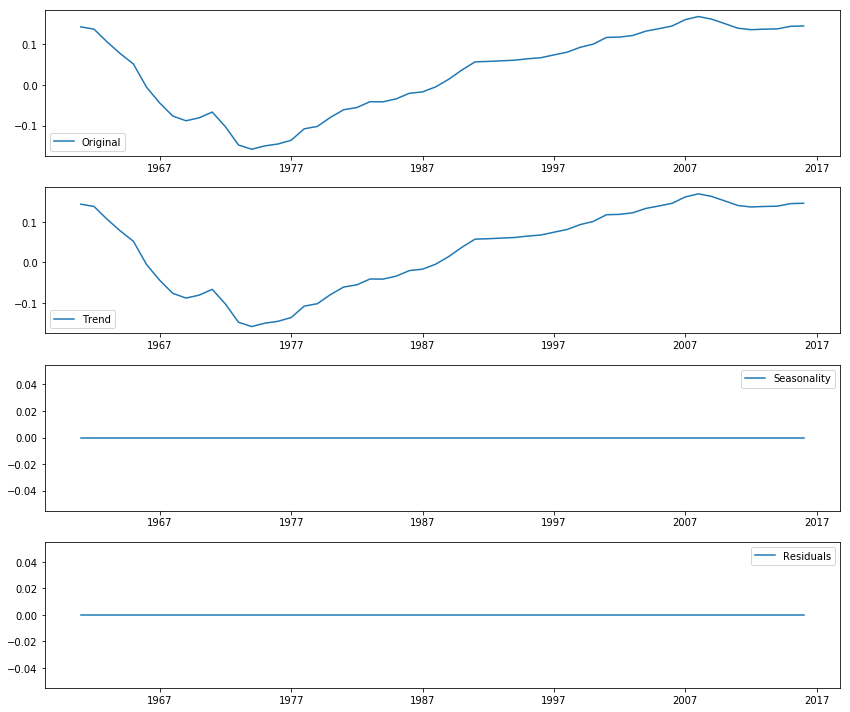

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=[12,10])
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Simple Exponential Smoothing

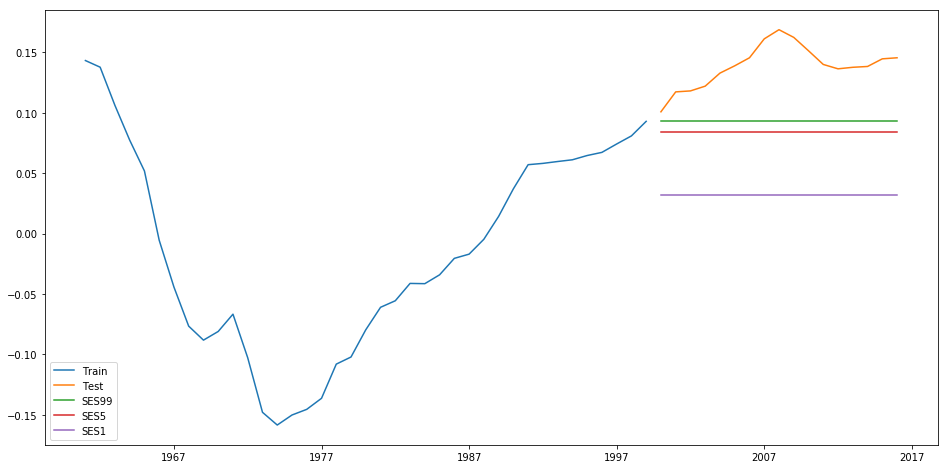

In [82]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

# create class
model = SimpleExpSmoothing(np.asarray(train['Positive Indicators']))

# fit model
model99_fit = model.fit(smoothing_level=0.99,optimized=False)
model5_fit = model.fit(smoothing_level=0.5,optimized=False)
model1_fit = model.fit(smoothing_level=0.1,optimized=False)

fcst_SES = test.copy()

fcst_SES['SES99'] = model99_fit.forecast(len(test['Positive Indicators']))
fcst_SES['SES5'] = model5_fit.forecast(len(test['Positive Indicators']))
fcst_SES['SES1'] = model1_fit.forecast(len(test['Positive Indicators']))

plt.figure(figsize=(16,8))
plt.plot(train['Positive Indicators'], label='Train')
plt.plot(test['Positive Indicators'], label='Test')
plt.plot(fcst_SES['SES99'], label='SES99')
plt.plot(fcst_SES['SES5'], label='SES5')
plt.plot(fcst_SES['SES1'], label='SES1')
plt.legend(loc='best')

#fcst_SES['SES99']


In [83]:
#
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Optimum Parameter Model

In [84]:
from sklearn.metrics import mean_squared_error
mape=mean_absolute_percentage_error(test['Positive Indicators'],fcst_SES['SES99'])
print('The MAPE value for base model is :',mape)

rmse =np.sqrt(mean_squared_error(test['Positive Indicators'],fcst_SES['SES99']))
print('The RMSE score for base model is:',rmse)

model_opt_fit = model.fit()

model_opt_fit.model.params


The MAPE value for base model is : 32.12933298110111
The RMSE score for base model is: 0.0491624883412467


{'smoothing_level': 1.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 0.143233368,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

The MAPE value for base model is : 32.040714697209104
The RMSE score for base model is: 0.04904881523548916


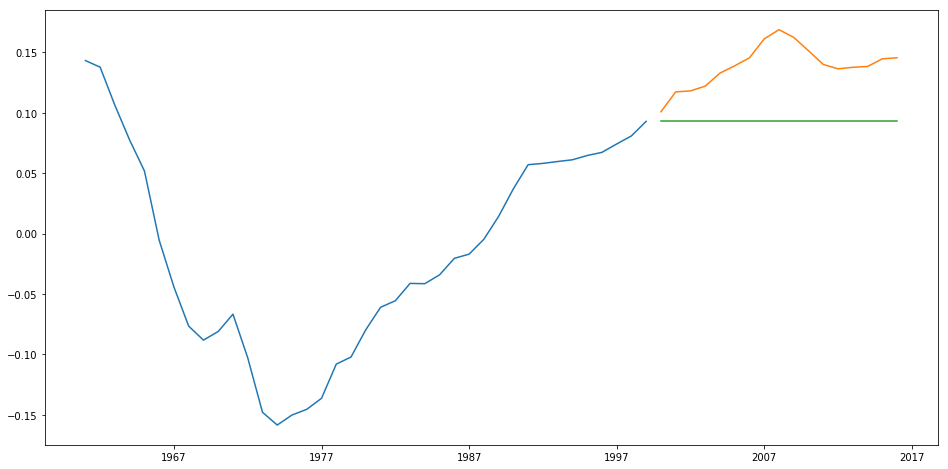

In [85]:
# create class
model = SimpleExpSmoothing(np.asarray(train['Positive Indicators']))

# fit model
model99_fit = model.fit(smoothing_level=1,optimized=False)
fcst_SES = test.copy()
fcst_SES['test'] = model99_fit.forecast(len(test['Positive Indicators']))

mape=mean_absolute_percentage_error(test['Positive Indicators'],fcst_SES['test'])
print('The MAPE value for base model is :',mape)

rmse =np.sqrt(mean_squared_error(test['Positive Indicators'],fcst_SES['test']))
print('The RMSE score for base model is:',rmse)



plt.figure(figsize=(16,8))
plt.plot(train['Positive Indicators'], label='Train')
plt.plot(test['Positive Indicators'], label='Test')
plt.plot(fcst_SES['test'], label='Test Forecasted')

# Double Exponential (Holt)

In [86]:
model = Holt(np.asarray(train['Positive Indicators']))
model_fit = model.fit(smoothing_level = 0.9,smoothing_slope = 0.3,optimized=False)
fcst_Holt = test.copy()
fcst_Holt['Holt'] = model_fit.forecast(len(test['Positive Indicators']))


In [87]:
model_fit.fittedvalues

array([ 0.1377206 ,  0.13865777,  0.13353696,  0.09722661,  0.06238693,
        0.03300909, -0.03189261, -0.07661541, -0.11022122, -0.11806769,
       -0.10239257, -0.07830711, -0.114955  , -0.1681938 , -0.18037254,
       -0.16597259, -0.15479052, -0.1404543 , -0.10482269, -0.09522121,
       -0.06979484, -0.04812071, -0.04310571, -0.0291914 , -0.03130455,
       -0.02568464, -0.01145795, -0.00841036,  0.0039538 ,  0.02502387,
        0.05089889,  0.0731319 ,  0.07226661,  0.07016816,  0.06879733,
        0.07070054,  0.0722886 ,  0.0792096 ,  0.086368  ])

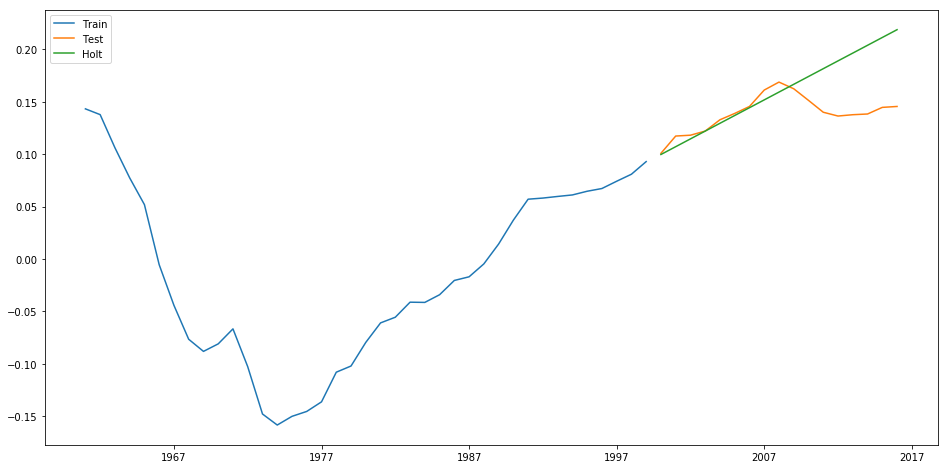

In [88]:
plt.figure(figsize=(16,8))
plt.plot(train['Positive Indicators'], label='Train')
#plt.plot(model31_fit.fittedvalues, label='fitted81')
#plt.plot(model31_fit.fittedvalues, label='fitted93')
plt.plot(test['Positive Indicators'], label='Test')
#plt.plot(fcst_Holt['Holt81'], label='Holt81')
plt.plot(fcst_Holt['Holt'], label='Holt')
plt.legend(loc='best')


In [89]:
## New alpha and Beta values

MAPE=[]
a=[]
b=[]
for i in np.arange(0,1,0.1):
    for j in np.arange(0,1,0.1):
        model = Holt(np.asarray(train['Positive Indicators']))
        modelopt_fit=model.fit(smoothing_level=i,smoothing_slope=j)
        fcst_Holt['Opt2'] = modelopt_fit.forecast(len(test['Positive Indicators']))#70-30
        a.append(i)
        b.append(j)
        MAPE.append(mean_absolute_percentage_error(test['Positive Indicators'],fcst_Holt['Opt2'] ))
d=pd.DataFrame({'Alpha':a,'Beta':b,'MAPE':MAPE})


m=d.MAPE.min()
d[d.MAPE==m]


,Alpha,Beta,MAPE
0,0.0,0.0,10.3715
1,0.0,0.1,10.3715
2,0.0,0.2,10.3715
3,0.0,0.3,10.3715
4,0.0,0.4,10.3715
5,0.0,0.5,10.3715
6,0.0,0.6,10.3715
7,0.0,0.7,10.3715
8,0.0,0.8,10.3715
9,0.0,0.9,10.3715


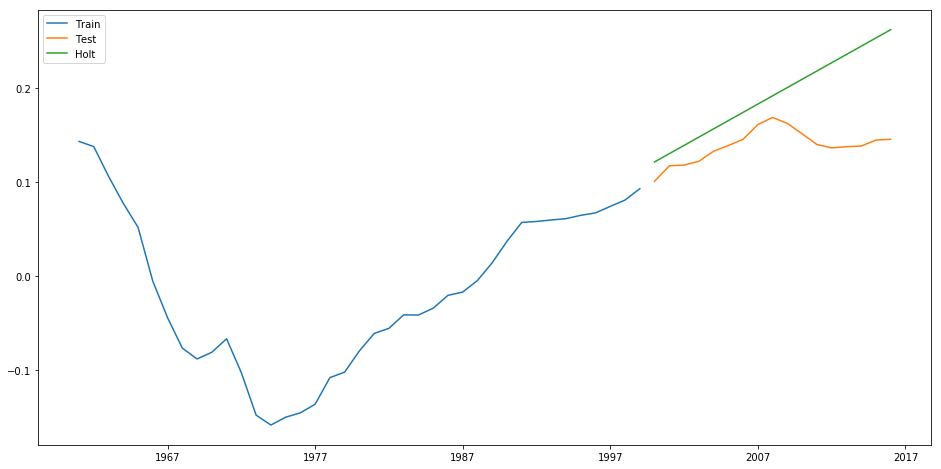

In [90]:
# Model with minimum MAPE
model = Holt(np.asarray(train['Positive Indicators']))
model_fit = model.fit(smoothing_level =0.2,smoothing_slope = 0.2,optimized=False)
fcst_Holt = test.copy()
fcst_Holt['Holt'] = model_fit.forecast(len(test['Positive Indicators']))


plt.figure(figsize=(16,8))
plt.plot(train['Positive Indicators'], label='Train')
plt.plot(test['Positive Indicators'], label='Test')
plt.plot(fcst_Holt['Holt'], label='Holt')
plt.legend(loc='best')


# Forecasting the Positive Indicators for 2016-2020

In [91]:
## Future Forecast with full data for India
model = Holt(np.asarray(df['Positive Indicators']))
model_fit = model.fit(smoothing_level =0.2,smoothing_slope = 0.2,optimized=False)


fct=model_fit.forecast(5)
print("The forcasted value for 5 years is:\n\n",fct)

The forcasted value for 5 years is:

 [0.15240101 0.15173671 0.1510724  0.15040809 0.14974378]


In [92]:
# Creating new dataframe to combine both old data and new forecasted data
old=pd.DataFrame({'Time':df.Year,'Postive Indicator':df['Positive Indicators']})
time=pd.date_range(start='1/1/2016',end='31/12/2020',freq='y')
print(time)
new_time=[2016,2017,2018,2019,2020]
new=pd.DataFrame({'Time':new_time,'Postive Indicator':fct})
new.index=time
print(old.shape)
print(new.shape)

final=pd.DataFrame(pd.concat([old,new],axis=0))
final.head()

DatetimeIndex(['2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')
(56, 2)
(5, 2)


,Time,Postive Indicator
1960-12-31,1960,0.143233
1961-12-31,1961,0.137721
1962-12-31,1962,0.106158
1963-12-31,1963,0.077423
1964-12-31,1964,0.051822


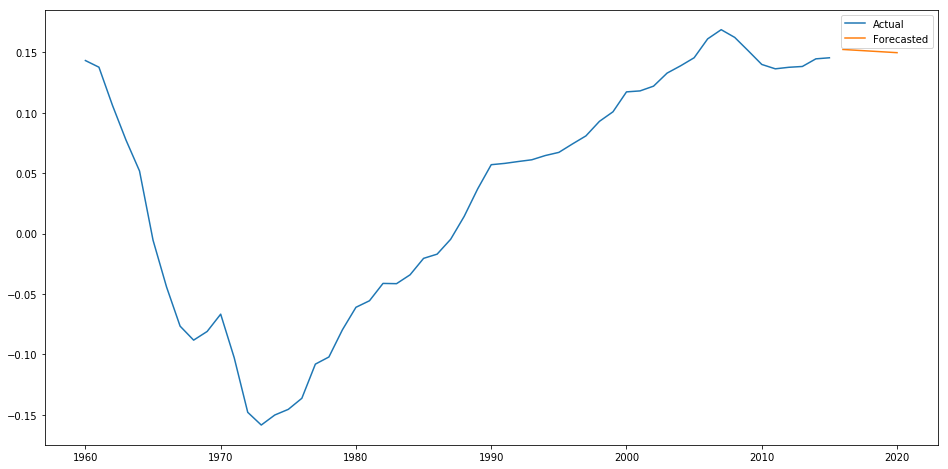

In [93]:
# Forecasted plot for India Positive Indicator
plt.figure(figsize=(16,8))
plt.plot(old.Time,old['Postive Indicator'],label='Actual')
plt.plot(new.Time,new['Postive Indicator'],label='Forecasted')
plt.legend(loc='best')

# ARIMA

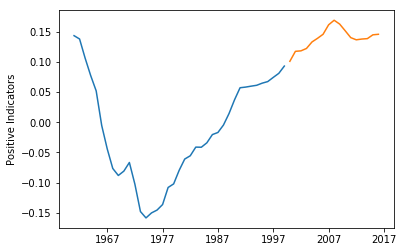

In [94]:
#Creating train and test set 
train=df[0:int(len(df)*0.7)] 
test=df[int(len(df)*0.7):]

type(train)
train.head()

# SImple Plot of Test and train data
sns.lineplot(train.index,train['Positive Indicators'],ci=None)
sns.lineplot(test.index,test['Positive Indicators'],ci=None)
plt.show()



In [95]:
ts=df['Positive Indicators'] 

C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array inde

Text(0.5,1,'RSS: 0.0145')

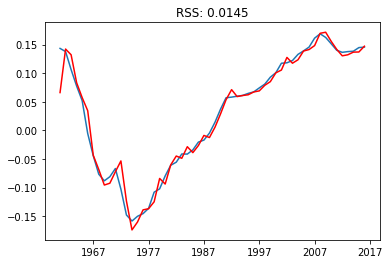

In [96]:
# ARIMA model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts, order=(2, 0, 0)) 
results_ARIMA = model.fit()  
plt.plot(ts)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts)**2))

In [97]:
# ARIMA model summary
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                              
===============================================================================
Dep. Variable:     Positive Indicators   No. Observations:                   56
Model:                      ARMA(2, 0)   Log Likelihood                 163.862
Method:                        css-mle   S.D. of innovations              0.012
Date:                 Mon, 01 Apr 2019   AIC                           -319.724
Time:                         21:41:21   BIC                           -311.623
Sample:                     12-31-1960   HQIC                          -316.583
                          - 12-31-2015                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0660      0.059      1.121      0.267      -0.049       0.182
ar.L1.Positive Indicators     1.6701      0.091     18.409      0.000       1.492       1.848
ar.L2.Positive Indicators    -0.6952      0.092     -7.566      0.000      -0.875      -0.515
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1352           +0.0000j            1.1352            0.0000
AR.2            1.2671           +0.0000j            1.2671            0.0000
-----------------------------------------------------------------------------
"""

In [98]:
# Predicting the values for Training part

pred=results_ARIMA.predict()
print(len(pred))
df['Forecasted_Positive_Indicator']=pred
#df.drop('Forecasted',axis=1,inplace=True)
df

56


,Year,Country Name,Positive Indicators,Negative Indicators,Forecasted_Positive_Indicator
1960-12-31,1960,United States,0.143233,0.319419,0.066039
1961-12-31,1961,United States,0.137721,0.343362,0.142090
1962-12-31,1962,United States,0.106158,0.315122,0.132089
1963-12-31,1963,United States,0.077423,0.287676,0.083208
1964-12-31,1964,United States,0.051822,0.267723,0.057159
1965-12-31,1965,United States,-0.005480,0.218852,0.034379
1966-12-31,1966,United States,-0.044253,0.184184,-0.043524
1967-12-31,1967,United States,-0.076622,0.157914,-0.068441
1968-12-31,1968,United States,-0.088209,0.125594,-0.095545
1969-12-31,1969,United States,-0.081032,0.127526,-0.092394


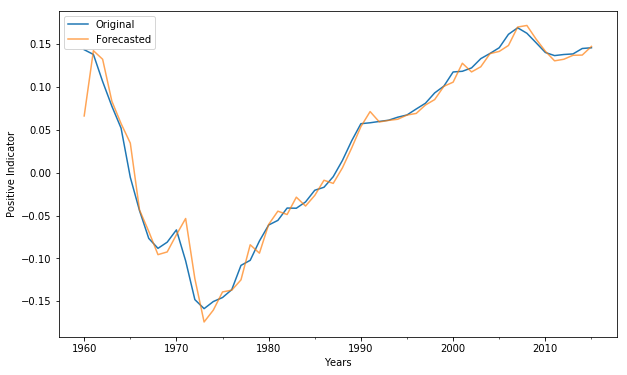

In [99]:
axis = df['Positive Indicators'].plot(label='Original', figsize=(10, 6))
#df['Positive Indicators'].plot(ax=axis, label='Test', alpha=0.7)
df['Forecasted_Positive_Indicator'].plot(ax=axis, label='Forecasted', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Positive Indicator')
plt.legend(loc='best')
plt.show()
plt.close()

In [100]:
forecast=results_ARIMA.forecast(steps=5,alpha=0.95)
LI=[]
UI=[]
for i in forecast[2]:
    LI.append(i[0])
    UI.append(i[1])

In [101]:
df_new=pd.DataFrame({'Forecast 2016-2020':forecast[0],'Standard Error':forecast[1],'CI lower':LI,'CI Upper':UI})

time=pd.date_range(start='1/1/2016',end='31/12/2020',freq='y')
df_new.index=time
df_new

,Forecast 2016-2020,Standard Error,CI lower,CI Upper
2016-12-31,0.144129,0.012421,0.143350,0.144908
2017-12-31,0.141205,0.024180,0.139689,0.142721
2018-12-31,0.137286,0.035515,0.135059,0.139513
2019-12-31,0.132772,0.045864,0.129896,0.135648
2020-12-31,0.127960,0.055016,0.124510,0.131409


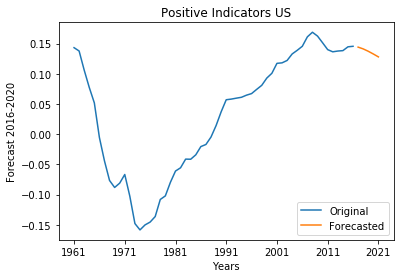

In [102]:
sns.lineplot(df.index,df['Positive Indicators'],ci=None,label='Original')
sns.lineplot(df_new.index,df_new['Forecast 2016-2020'],ci=None,label='Forecasted')
plt.title('Positive Indicators US')
plt.xlabel('Years')
plt.legend()
plt.show()

# Model Evaluation

In [103]:
MAPE=[]
RMSE=[]
Acc=[]
# Simple Exponenetial model
mape=mean_absolute_percentage_error(test['Positive Indicators'],fcst_SES['test'])
MAPE.append(mape)
print('The MAPE value for SES model is :',mape)

rmse =np.sqrt(mean_squared_error(test['Positive Indicators'],fcst_SES['test']))
RMSE.append(rmse)
print('The RMSE score for SES model is:',rmse)

# Double Exponenetial model
mape=mean_absolute_percentage_error(test['Positive Indicators'],fcst_Holt['Holt'] )
MAPE.append(mape)
print('The MAPE value for DES model is :',mape)

rmse =np.sqrt(mean_squared_error(test['Positive Indicators'],fcst_Holt['Holt']))
RMSE.append(rmse)
print('The RMSE score for DES model is:',rmse)

# ARIMA
# Compute the root mean square error
from sklearn.metrics import  accuracy_score
mape=mean_absolute_percentage_error(df['Positive Indicators'],df['Forecasted_Positive_Indicator'])
MAPE.append(mape)
print('The MAPE value for ARIMA model is :',mape)
mse = ((df['Positive Indicators'] - df['Forecasted_Positive_Indicator']) ** 2).mean()
rmse = np.sqrt(mse)
RMSE.append(rmse)
print('The Root Mean Squared Error of ARIMA model  is {}'.format(round(rmse, 3)))



The MAPE value for SES model is : 32.040714697209104
The RMSE score for SES model is: 0.04904881523548916
The MAPE value for DES model is : 37.736272990496865
The RMSE score for DES model is: 0.06427134025691716
The MAPE value for ARIMA model is : 27.381646884923978
The Root Mean Squared Error of ARIMA model  is 0.016


In [104]:
Country=['US','US','US']
Models=['SES','DES','ARIMA']
Indicators=['Positive Indicators','Positive Indicators','Positive Indicators']

Eval_Metrices_US_Pos=pd.DataFrame({'Country Name':Country,'Model Name':Models,'Indicator Name':Indicators,'Test MAPE':MAPE,'Test RMSE':RMSE,
                                 })
Eval_Metrices_US_Pos

,Country Name,Model Name,Indicator Name,Test MAPE,Test RMSE
0,US,SES,Positive Indicators,32.040715,0.049049
1,US,DES,Positive Indicators,37.736273,0.064271
2,US,ARIMA,Positive Indicators,27.381647,0.016101


# Negative Indicator

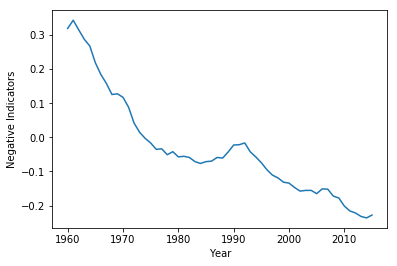

In [105]:
sns.lineplot(df['Year'],df['Negative Indicators'],ci=None)
plt.show()

# Splitting data into train and test

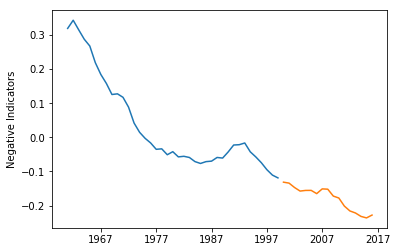

In [106]:
#Creating train and test set 
train=df[0:int(len(df)*0.7)] 
test=df[int(len(df)*0.7):]

type(train)
train.head()

# SImple Plot of Test and train data
sns.lineplot(train.index,train['Negative Indicators'],ci=None)
sns.lineplot(test.index,test['Negative Indicators'],ci=None)
plt.show()


# Decomposition Models

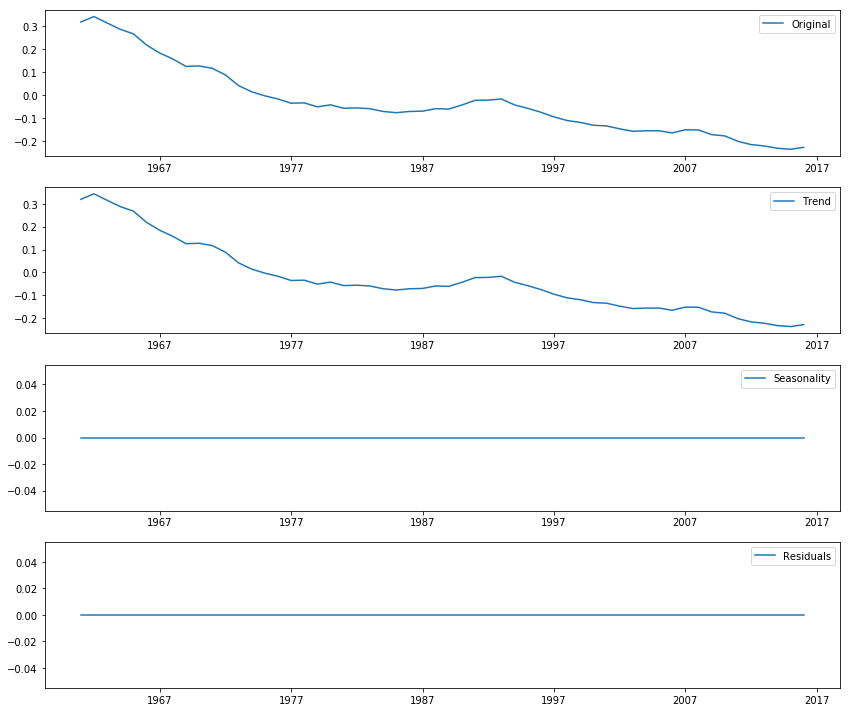

In [107]:
ts=df['Negative Indicators']
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=[12,10])
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Simple Exponential Smoothing

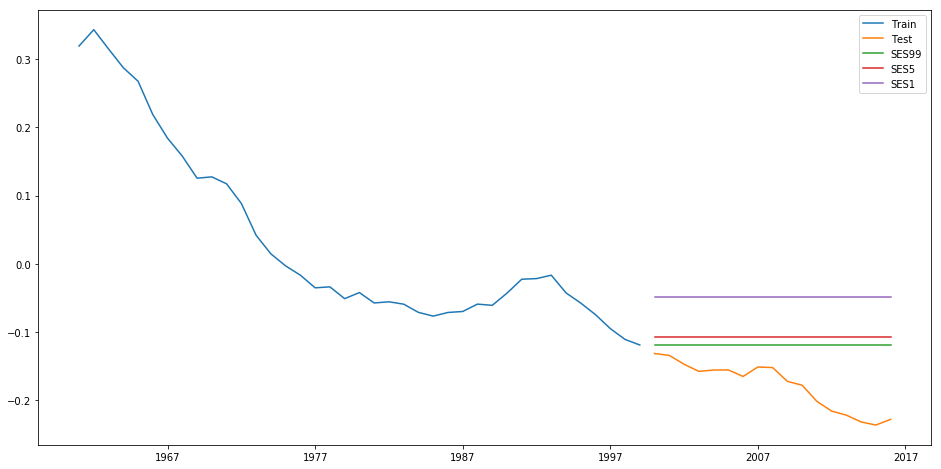

In [108]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

# create class
model = SimpleExpSmoothing(np.asarray(train['Negative Indicators']))

# fit model
model99_fit = model.fit(smoothing_level=0.99,optimized=False)
model5_fit = model.fit(smoothing_level=0.5,optimized=False)
model1_fit = model.fit(smoothing_level=0.1,optimized=False)

fcst_SES = test.copy()

fcst_SES['SES99'] = model99_fit.forecast(len(test['Negative Indicators']))
fcst_SES['SES5'] = model5_fit.forecast(len(test['Negative Indicators']))
fcst_SES['SES1'] = model1_fit.forecast(len(test['Negative Indicators']))

plt.figure(figsize=(16,8))
plt.plot(train['Negative Indicators'], label='Train')
plt.plot(test['Negative Indicators'], label='Test')
plt.plot(fcst_SES['SES99'], label='SES99')
plt.plot(fcst_SES['SES5'], label='SES5')
plt.plot(fcst_SES['SES1'], label='SES1')
plt.legend(loc='best')


In [109]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Optimum Parameter Model

In [110]:

from sklearn.metrics import mean_squared_error
mape=mean_absolute_percentage_error(test['Negative Indicators'],fcst_SES['SES99'])
print('The MAPE value for base model is :',mape)

rmse =np.sqrt(mean_squared_error(test['Negative Indicators'],fcst_SES['SES99']))
print('The RMSE score for base model is:',rmse)

model_opt_fit = model.fit()

model_opt_fit.model.params



The MAPE value for base model is : 30.949255631491614
The RMSE score for base model is: 0.0691819455658256


{'smoothing_level': 1.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 0.31941865283333337,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

The MAPE value for base model is : 30.90090023188824
The RMSE score for base model is: 0.06911008764440549


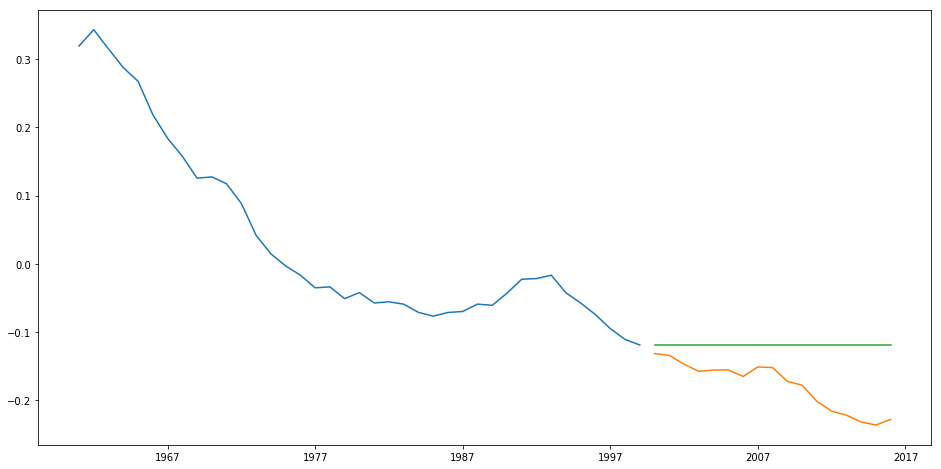

In [111]:
# create class
model = SimpleExpSmoothing(np.asarray(train['Negative Indicators']))

# fit model
model99_fit = model.fit(smoothing_level=1,optimized=False)
fcst_SES = test.copy()
fcst_SES['test_1'] = model99_fit.forecast(len(test['Negative Indicators']))

mape=mean_absolute_percentage_error(test['Negative Indicators'],fcst_SES['test_1'])
print('The MAPE value for base model is :',mape)

rmse =np.sqrt(mean_squared_error(test['Negative Indicators'],fcst_SES['test_1']))
print('The RMSE score for base model is:',rmse)



plt.figure(figsize=(16,8))
plt.plot(train['Negative Indicators'], label='Train')
plt.plot(test['Negative Indicators'], label='Test')
plt.plot(fcst_SES['test_1'], label='Test Forecasted')

# Double Exponential (Holt)

In [112]:
model = Holt(np.asarray(train['Negative Indicators']))
model_fit = model.fit(smoothing_level = 0.9,smoothing_slope = 0.3,optimized=False)
fcst_Holt = test.copy()
fcst_Holt['Holt_1'] = model_fit.forecast(len(test['Negative Indicators']))


In [113]:
model_fit.fittedvalues

array([ 0.3433618 ,  0.33929147,  0.36153226,  0.32580977,  0.28723974,
        0.26015591,  0.20231178,  0.16043097,  0.13192043,  0.09827346,
        0.10454578,  0.0994628 ,  0.07015395,  0.01752038, -0.01296465,
       -0.02924705, -0.03967497, -0.05621377, -0.0505497 , -0.06569295,
       -0.05280249, -0.06647184, -0.06335587, -0.06503329, -0.07768656,
       -0.08360849, -0.07605207, -0.07233763, -0.05866642, -0.05947415,
       -0.03901737, -0.01415317, -0.01285996, -0.00924922, -0.04125179,
       -0.06229106, -0.08299714, -0.10668247, -0.12444536])

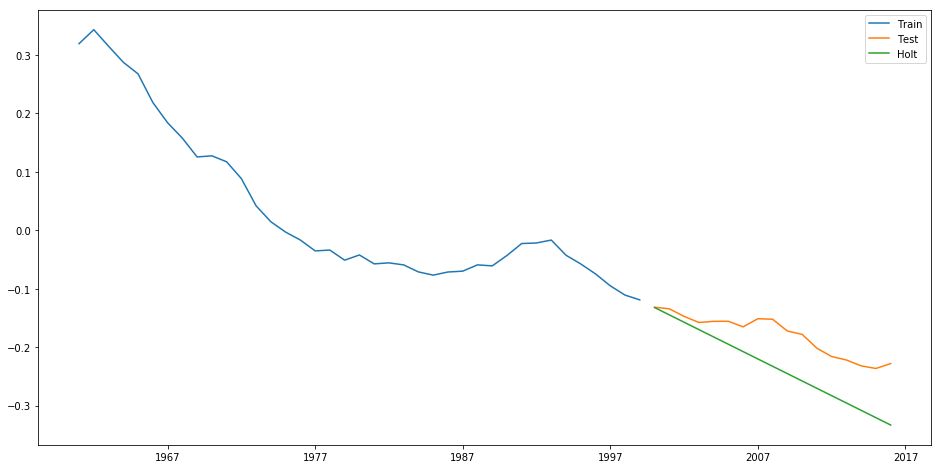

In [114]:
plt.figure(figsize=(16,8))
plt.plot(train['Negative Indicators'], label='Train')
plt.plot(test['Negative Indicators'], label='Test')
plt.plot(fcst_Holt['Holt_1'], label='Holt')
plt.legend(loc='best')

In [115]:
## New alpha and Beta values

MAPE=[]
a=[]
b=[]
for i in np.arange(0,1,0.1):
    for j in np.arange(0,1,0.1):
        model = Holt(np.asarray(train['Negative Indicators']))
        modelopt_fit=model.fit(smoothing_level=i,smoothing_slope=j)
        fcst_Holt['Opt2'] = modelopt_fit.forecast(len(test['Negative Indicators']))#70-30
        a.append(i)
        b.append(j)
        MAPE.append(mean_absolute_percentage_error(test['Negative Indicators'],fcst_Holt['Opt2'] ))
d=pd.DataFrame({'Alpha':a,'Beta':b,'MAPE':MAPE})


m=d.MAPE.min()
d[d.MAPE==m]

,Alpha,Beta,MAPE
61,0.6,0.1,5.934798


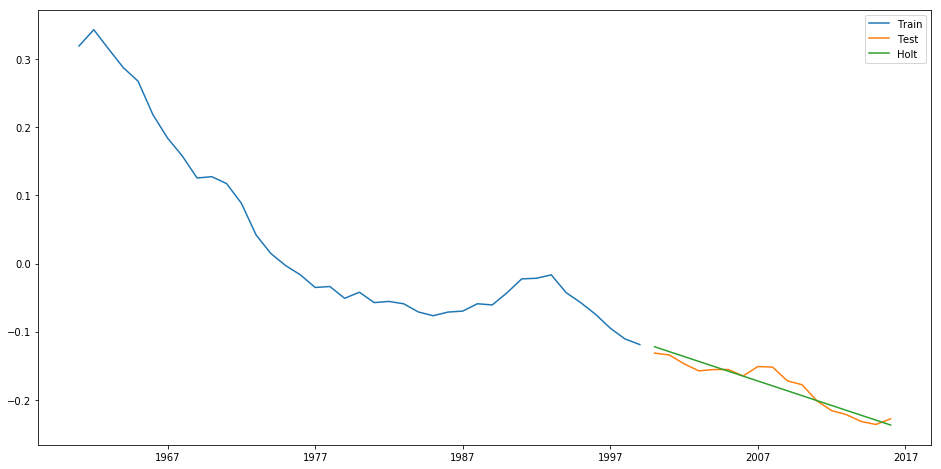

In [116]:
# Model with minimum MAPE
model = Holt(np.asarray(train['Negative Indicators']))
model_fit = model.fit(smoothing_level =0.6,smoothing_slope = 0.1,optimized=False)
fcst_Holt = test.copy()
fcst_Holt['Holt_1'] = model_fit.forecast(len(test['Negative Indicators']))


plt.figure(figsize=(16,8))
plt.plot(train['Negative Indicators'], label='Train')
plt.plot(test['Negative Indicators'], label='Test')
plt.plot(fcst_Holt['Holt_1'], label='Holt')
plt.legend(loc='best')


# Forecasting the negative indicators for 2016-2020

In [117]:
## Future Forecast with full data for United States
model = Holt(np.asarray(df['Negative Indicators']))
model_fit = model.fit(smoothing_level =0.6,smoothing_slope = 0.1,optimized=False)


fct=model_fit.forecast(5)
print("The forcasted value for 5 years is:\n\n",fct)

The forcasted value for 5 years is:

 [-0.24203511 -0.24910956 -0.25618402 -0.26325848 -0.27033293]


In [118]:
# Creating new dataframe to combine both old data and new forecasted data
old=pd.DataFrame({'Time':df.Year,'Negative Indicator':df['Negative Indicators']})
time=pd.date_range(start='1/1/2016',end='31/12/2020',freq='y')
print(time)
new_time=[2016,2017,2018,2019,2020]
new=pd.DataFrame({'Time':new_time,'Negative Indicator':fct})
new.index=time
print(old.shape)
print(new.shape)

final=pd.DataFrame(pd.concat([old,new],axis=0))
final.head()

DatetimeIndex(['2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')
(56, 2)
(5, 2)


,Time,Negative Indicator
1960-12-31,1960,0.319419
1961-12-31,1961,0.343362
1962-12-31,1962,0.315122
1963-12-31,1963,0.287676
1964-12-31,1964,0.267723


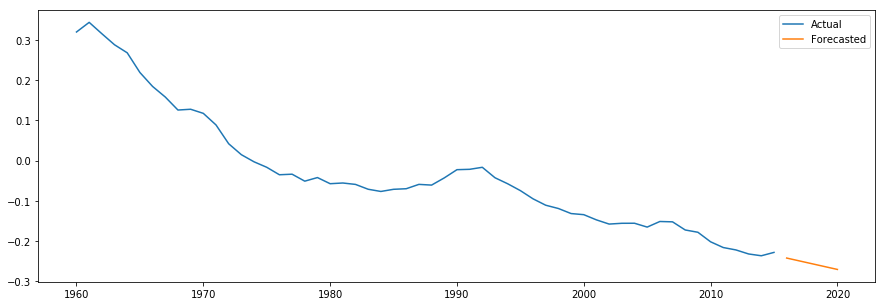

In [119]:
# Forecasted plot for India Negative Indicator
plt.figure(figsize=(15,5))
plt.plot(old.Time,old['Negative Indicator'],label='Actual')
plt.plot(new.Time,new['Negative Indicator'],label='Forecasted')
plt.legend(loc='best')

### ARIMA Model


In [120]:
ts=df['Negative Indicators']

Text(0.5,1,'RSS: nan')

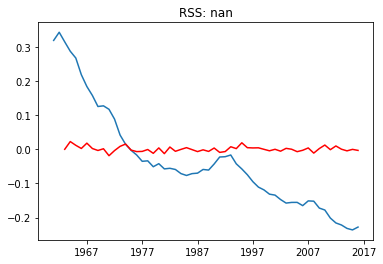

In [121]:
# ARIMA model
model = ARIMA(ts, order=(0, 2, 1)) 
results_ARIMA = model.fit()  
plt.plot(ts)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts)**2))

In [122]:
# ARIMA model summary
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARIMA Model Results                                
==================================================================================
Dep. Variable:     D2.Negative Indicators   No. Observations:                   54
Model:                     ARIMA(0, 2, 1)   Log Likelihood                 152.279
Method:                           css-mle   S.D. of innovations              0.014
Date:                    Mon, 01 Apr 2019   AIC                           -298.559
Time:                            21:41:25   BIC                           -292.592
Sample:                        12-31-1962   HQIC                          -296.257
                             - 12-31-2015                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0001      0.001      0.120      0.905      -0.002       0.002
ma.L1.D2.Negative Indicators    -0.5768      0.190     -3.029      0.004      -0.950      -0.204
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.7337           +0.0000j            1.7337            0.0000
-----------------------------------------------------------------------------
"""

In [123]:
ts.head()

1960-12-31    0.319419
1961-12-31    0.343362
1962-12-31    0.315122
1963-12-31    0.287676
1964-12-31    0.267723
Freq: A-DEC, Name: Negative Indicators, dtype: float64

In [124]:
# Predicting the values for Training part
pred=results_ARIMA.predict()
print(len(pred))
df['Forecasted_Negative_Indicator']=pred
#df.drop('Forecasted',axis=1,inplace=True)
df

54


,Year,Country Name,Positive Indicators,Negative Indicators,Forecasted_Positive_Indicator,Forecasted_Negative_Indicator
1960-12-31,1960,United States,0.143233,0.319419,0.066039,NaN
1961-12-31,1961,United States,0.137721,0.343362,0.142090,NaN
1962-12-31,1962,United States,0.106158,0.315122,0.132089,0.000103
1963-12-31,1963,United States,0.077423,0.287676,0.083208,0.022733
1964-12-31,1964,United States,0.051822,0.267723,0.057159,0.011788
1965-12-31,1965,United States,-0.005480,0.218852,0.034379,0.002519
1966-12-31,1966,United States,-0.044253,0.184184,-0.043524,0.018087
1967-12-31,1967,United States,-0.076622,0.157914,-0.068441,0.002338
1968-12-31,1968,United States,-0.088209,0.125594,-0.095545,-0.003389
1969-12-31,1969,United States,-0.081032,0.127526,-0.092394,0.001638


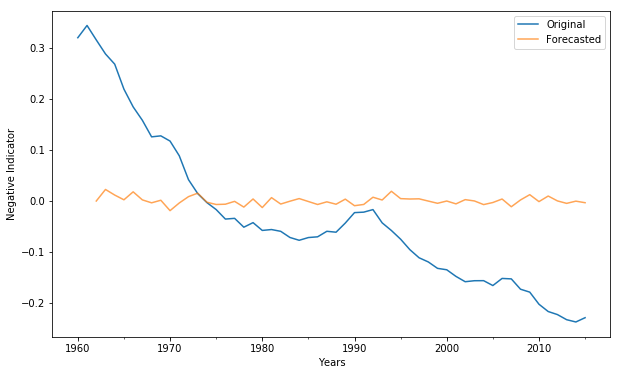

In [125]:
axis = df['Negative Indicators'].plot(label='Original', figsize=(10, 6))
#df['Positive Indicators'].plot(ax=axis, label='Test', alpha=0.7)
df['Forecasted_Negative_Indicator'].plot(ax=axis, label='Forecasted', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Negative Indicator')
plt.legend(loc='best')
plt.show()
plt.close()

In [126]:
forecast=results_ARIMA.forecast(steps=5,alpha=0.95)
LI=[]
UI=[]
for i in forecast[2]:
    LI.append(i[0])
    UI.append(i[1])

C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


In [127]:
df_new=pd.DataFrame({'Forecast 2016-2020':forecast[0],'Standard Error':forecast[1],'CI lower':LI,'CI Upper':UI})

time=pd.date_range(start='1/1/2016',end='31/12/2020',freq='y')
df_new.index=time
df_new

,Forecast 2016-2020,Standard Error,CI lower,CI Upper
2016-12-31,-0.228761,0.014369,-0.229662,-0.227860
2017-12-31,-0.229421,0.024994,-0.230988,-0.227854
2018-12-31,-0.229977,0.036450,-0.232263,-0.227692
2019-12-31,-0.230431,0.048910,-0.233498,-0.227364
2020-12-31,-0.230780,0.062365,-0.234691,-0.226869


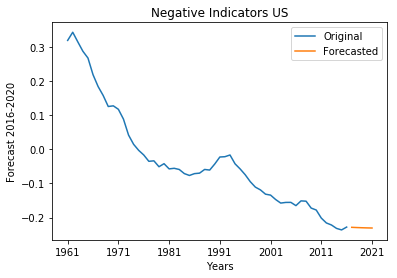

In [128]:
sns.lineplot(df.index,df['Negative Indicators'],ci=None,label='Original')
sns.lineplot(df_new.index,df_new['Forecast 2016-2020'],ci=None,label='Forecasted')
plt.title('Negative Indicators US')
plt.xlabel('Years')
plt.legend()
plt.show()

# Model Evaluations

In [129]:
MAPE=[]
RMSE=[]
Acc=[]
# Simple Exponenetial model
mape=mean_absolute_percentage_error(test['Negative Indicators'],fcst_SES['test_1'])
MAPE.append(mape)
print('The MAPE value for SES model is :',mape)

rmse =np.sqrt(mean_squared_error(test['Negative Indicators'],fcst_SES['test_1']))
RMSE.append(rmse)
print('The RMSE score for SES model is:',rmse)


# Double Exponenetial model
mape=mean_absolute_percentage_error(test['Negative Indicators'],fcst_Holt['Holt_1'] )
MAPE.append(mape)
print('The MAPE value for DES model is :',mape)

rmse =np.sqrt(mean_squared_error(test['Negative Indicators'],fcst_Holt['Holt_1']))
RMSE.append(rmse)
print('The RMSE score for DES model is:',rmse)


# ARIMA
# Compute the root mean square error
from sklearn.metrics import  accuracy_score
mape=mean_absolute_percentage_error(df['Negative Indicators'][2:],df['Forecasted_Negative_Indicator'][2:])
MAPE.append(mape)
print('The MAPE value for ARIMA model is :',mape)
mse = ((df['Negative Indicators'] - df['Forecasted_Negative_Indicator']) ** 2).mean()
rmse = np.sqrt(mse)
RMSE.append(rmse)
print('The Root Mean Squared Error of ARIMA model  is {}'.format(round(rmse, 3)))


The MAPE value for SES model is : 30.90090023188824
The RMSE score for SES model is: 0.06911008764440549
The MAPE value for DES model is : 5.790829644470928
The RMSE score for DES model is: 0.011959563724777526
The MAPE value for ARIMA model is : 94.96094212196101
The Root Mean Squared Error of ARIMA model  is 0.14


In [130]:
Country=['US','US','US']
Models=['SES','DES','ARIMA']
Indicators=['Negative Indicators','Negative Indicators','Negative Indicators']

Eval_Metrices_US_Neg=pd.DataFrame({'Country Name':Country,'Model Name':Models,'Indicator Name':Indicators,'Test MAPE':MAPE,'Test RMSE':RMSE,
                                 })
Eval_Metrices_US_Neg

,Country Name,Model Name,Indicator Name,Test MAPE,Test RMSE
0,US,SES,Negative Indicators,30.900900,0.069110
1,US,DES,Negative Indicators,5.790830,0.011960
2,US,ARIMA,Negative Indicators,94.960942,0.139612


In [131]:
Eval_Metrices_US=pd.concat([Eval_Metrices_US_Pos,Eval_Metrices_US_Neg],axis=0)
Eval_Metrices_US

,Country Name,Model Name,Indicator Name,Test MAPE,Test RMSE
0,US,SES,Positive Indicators,32.040715,0.049049
1,US,DES,Positive Indicators,37.736273,0.064271
2,US,ARIMA,Positive Indicators,27.381647,0.016101
0,US,SES,Negative Indicators,30.900900,0.069110
1,US,DES,Negative Indicators,5.790830,0.011960
2,US,ARIMA,Negative Indicators,94.960942,0.139612


In [132]:
Eval_Metrices_US.to_csv('Model_US.csv',index=False)

# Time series forecasting for South Africa

In [133]:
# Final indicators
coun=Cap[['Year','Country Name']]
final=pd.concat([coun,Positive_Indicators,Negative_Indicators],axis=1)
final.head()

,Year,Country Name,Positive Indicators,Negative Indicators
0,1960,European Union,-0.018798,-0.079800
1,1961,European Union,-0.005911,-0.067707
2,1962,European Union,0.004137,-0.080640
3,1963,European Union,0.017272,-0.074264
4,1964,European Union,0.029848,-0.059224


In [134]:
df=final[final['Country Name']=='South Africa']

date_range=pd.date_range(start='1/1/1960',end='31/12/2015',freq='y')
date_range
df.index=date_range
df.head()


,Year,Country Name,Positive Indicators,Negative Indicators
1960-12-31,1960,South Africa,-0.256328,0.956816
1961-12-31,1961,South Africa,-0.249166,0.964875
1962-12-31,1962,South Africa,-0.244403,0.969741
1963-12-31,1963,South Africa,-0.241572,0.968274
1964-12-31,1964,South Africa,-0.240906,0.964349


In [135]:
df.columns

Index(['Year', 'Country Name', 'Positive Indicators', 'Negative Indicators'], dtype='object')

In [136]:
df.tail()

,Year,Country Name,Positive Indicators,Negative Indicators
2011-12-31,2011,South Africa,-0.797879,0.484599
2012-12-31,2012,South Africa,-0.758534,0.446164
2013-12-31,2013,South Africa,-0.761984,0.442359
2014-12-31,2014,South Africa,-0.765496,0.432709
2015-12-31,2015,South Africa,-0.763958,0.427722


In [137]:
df.isnull().sum()

Year                   0
Country Name           0
Positive Indicators    0
Negative Indicators    0
dtype: int64

# Positive Indicator

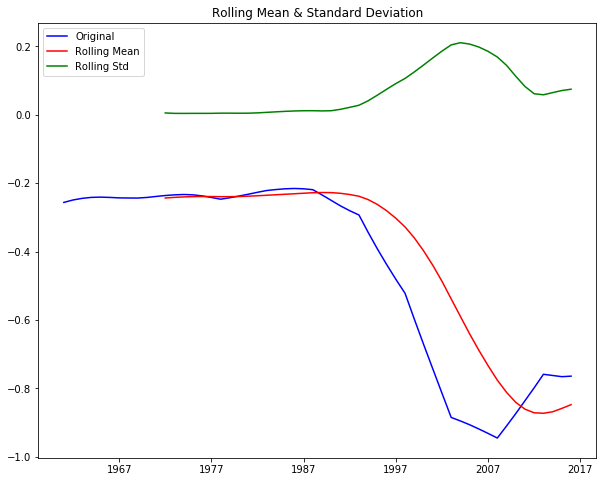

Results of Dickey-Fuller Test:
Test Statistic                 -0.060016
p-value                         0.953278
#Lags Used                     11.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


In [138]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean =timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    plt.figure(figsize=[10,8])
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
ts=df['Positive Indicators']    
test_stationarity(ts)    

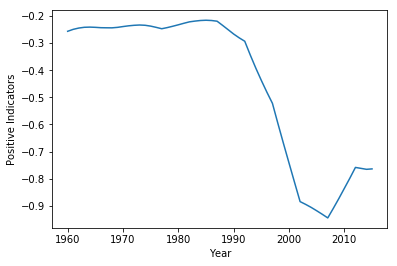

In [139]:
sns.lineplot(df['Year'],df['Positive Indicators'],ci=None)
plt.show()

# Splitting data into Train and Test

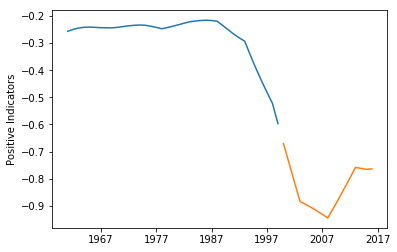

In [140]:
#Creating train and test set 
train=df[0:int(len(df)*0.7)] 
test=df[int(len(df)*0.7):]

type(train)
train.head()

# SImple Plot of Test and train data
sns.lineplot(train.index,train['Positive Indicators'],ci=None)
sns.lineplot(test.index,test['Positive Indicators'],ci=None)
plt.show()



# Decomposition Model

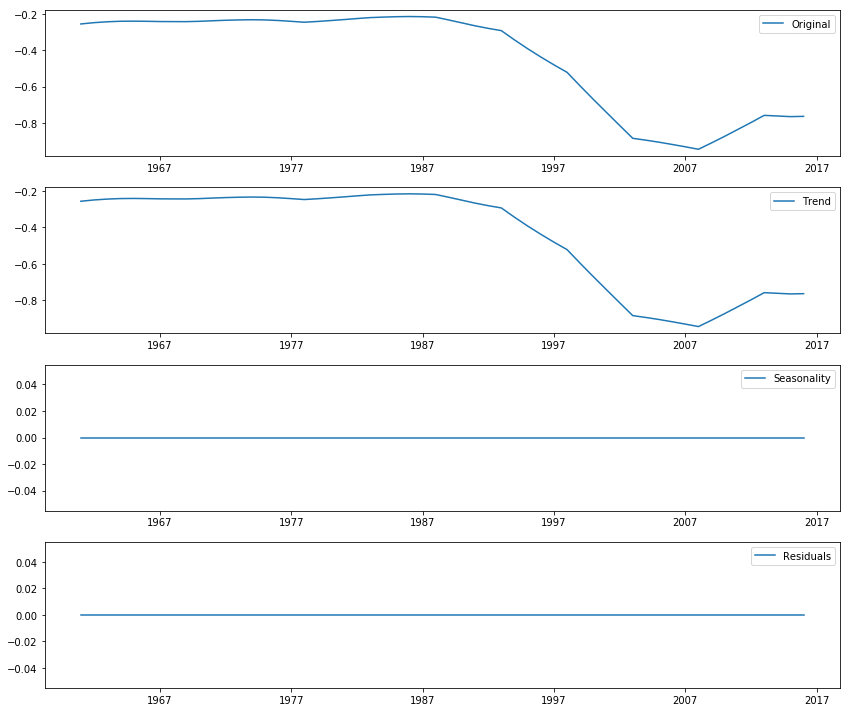

In [141]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=[12,10])
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Simple Exponential Smoothing

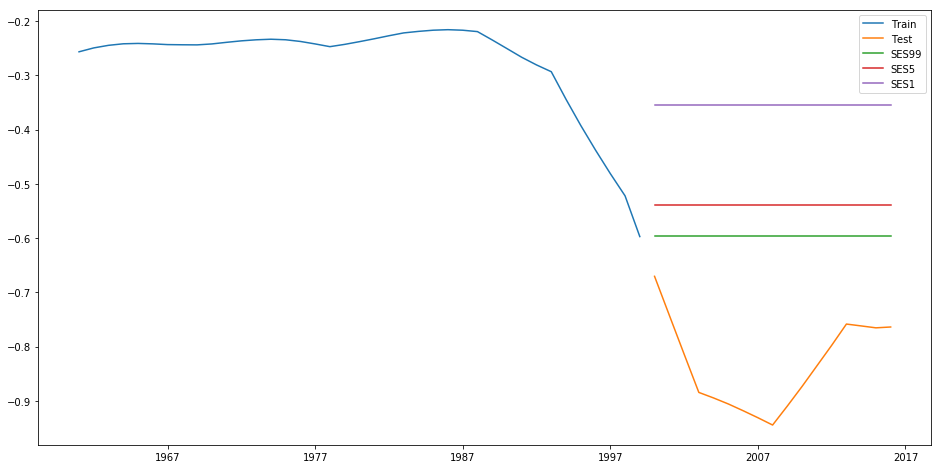

In [142]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

# create class
model = SimpleExpSmoothing(np.asarray(train['Positive Indicators']))

# fit model
model99_fit = model.fit(smoothing_level=0.99,optimized=False)
model5_fit = model.fit(smoothing_level=0.5,optimized=False)
model1_fit = model.fit(smoothing_level=0.1,optimized=False)

fcst_SES = test.copy()

fcst_SES['SES99'] = model99_fit.forecast(len(test['Positive Indicators']))
fcst_SES['SES5'] = model5_fit.forecast(len(test['Positive Indicators']))
fcst_SES['SES1'] = model1_fit.forecast(len(test['Positive Indicators']))

plt.figure(figsize=(16,8))
plt.plot(train['Positive Indicators'], label='Train')
plt.plot(test['Positive Indicators'], label='Test')
plt.plot(fcst_SES['SES99'], label='SES99')
plt.plot(fcst_SES['SES5'], label='SES5')
plt.plot(fcst_SES['SES1'], label='SES1')
plt.legend(loc='best')

#fcst_SES['SES99']


In [143]:
#
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Optimum Parameter Model

In [144]:
from sklearn.metrics import mean_squared_error
mape=mean_absolute_percentage_error(test['Positive Indicators'],fcst_SES['SES99'])
print('The MAPE value for base model is :',mape)

rmse =np.sqrt(mean_squared_error(test['Positive Indicators'],fcst_SES['SES99']))
print('The RMSE score for base model is:',rmse)

model_opt_fit = model.fit()

model_opt_fit.model.params


The MAPE value for base model is : 27.798381257551657
The RMSE score for base model is: 0.24996672660829905


{'smoothing_level': 1.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 0.0,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

The MAPE value for base model is : 27.706911460591304
The RMSE score for base model is: 0.24924954856932902


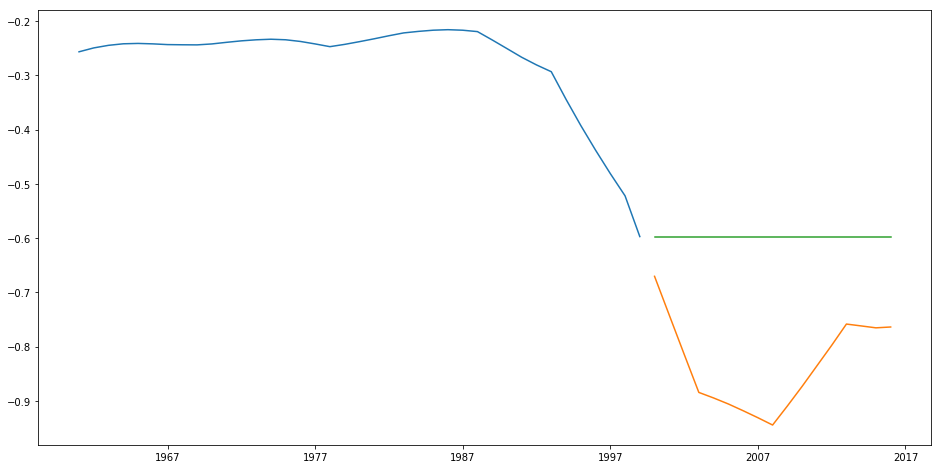

In [145]:
# create class
model = SimpleExpSmoothing(np.asarray(train['Positive Indicators']))

# fit model
model99_fit = model.fit(smoothing_level=1,optimized=False)
fcst_SES = test.copy()
fcst_SES['test'] = model99_fit.forecast(len(test['Positive Indicators']))

mape=mean_absolute_percentage_error(test['Positive Indicators'],fcst_SES['test'])
print('The MAPE value for base model is :',mape)

rmse =np.sqrt(mean_squared_error(test['Positive Indicators'],fcst_SES['test']))
print('The RMSE score for base model is:',rmse)



plt.figure(figsize=(16,8))
plt.plot(train['Positive Indicators'], label='Train')
plt.plot(test['Positive Indicators'], label='Test')
plt.plot(fcst_SES['test'], label='Test Forecasted')

# Double Exponential (Holt)

In [146]:
model = Holt(np.asarray(train['Positive Indicators']))
model_fit = model.fit(smoothing_level = 0.9,smoothing_slope = 0.3,optimized=False)
fcst_Holt = test.copy()
fcst_Holt['Holt'] = model_fit.forecast(len(test['Positive Indicators']))


In [147]:
model_fit.fittedvalues

array([-0.24916555, -0.25038319, -0.24372988, -0.23896029, -0.23663997,
       -0.23696067, -0.23899723, -0.24151672, -0.24256897, -0.24311185,
       -0.24126398, -0.23774842, -0.23452849, -0.23238642, -0.23141398,
       -0.2329587 , -0.23706493, -0.24288824, -0.24907423, -0.24417101,
       -0.23743605, -0.23060262, -0.2238188 , -0.21781809, -0.21491781,
       -0.21309115, -0.2127192 , -0.21459249, -0.21829574, -0.2369461 ,
       -0.25679385, -0.27580805, -0.29162665, -0.30488576, -0.36255085,
       -0.41979843, -0.47120387, -0.51797933, -0.56068765])

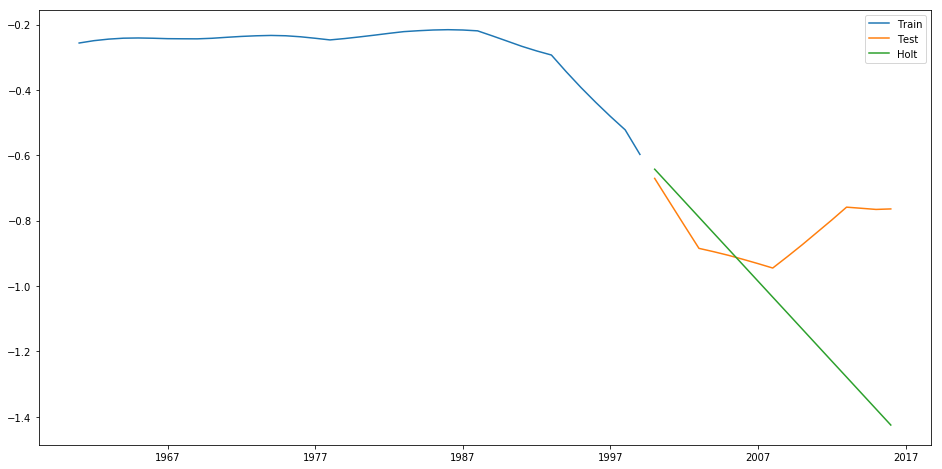

In [148]:
plt.figure(figsize=(16,8))
plt.plot(train['Positive Indicators'], label='Train')
#plt.plot(model31_fit.fittedvalues, label='fitted81')
#plt.plot(model31_fit.fittedvalues, label='fitted93')
plt.plot(test['Positive Indicators'], label='Test')
#plt.plot(fcst_Holt['Holt81'], label='Holt81')
plt.plot(fcst_Holt['Holt'], label='Holt')
plt.legend(loc='best')


In [149]:
## New alpha and Beta values

MAPE=[]
a=[]
b=[]
for i in np.arange(0,1,0.1):
    for j in np.arange(0,1,0.1):
        model = Holt(np.asarray(train['Positive Indicators']))
        modelopt_fit=model.fit(smoothing_level=i,smoothing_slope=j)
        fcst_Holt['Opt2'] = modelopt_fit.forecast(len(test['Positive Indicators']))#70-30
        a.append(i)
        b.append(j)
        MAPE.append(mean_absolute_percentage_error(test['Positive Indicators'],fcst_Holt['Opt2'] ))
d=pd.DataFrame({'Alpha':a,'Beta':b,'MAPE':MAPE})


m=d.MAPE.min()
d[d.MAPE==m]


,Alpha,Beta,MAPE
81,0.8,0.1,17.582194


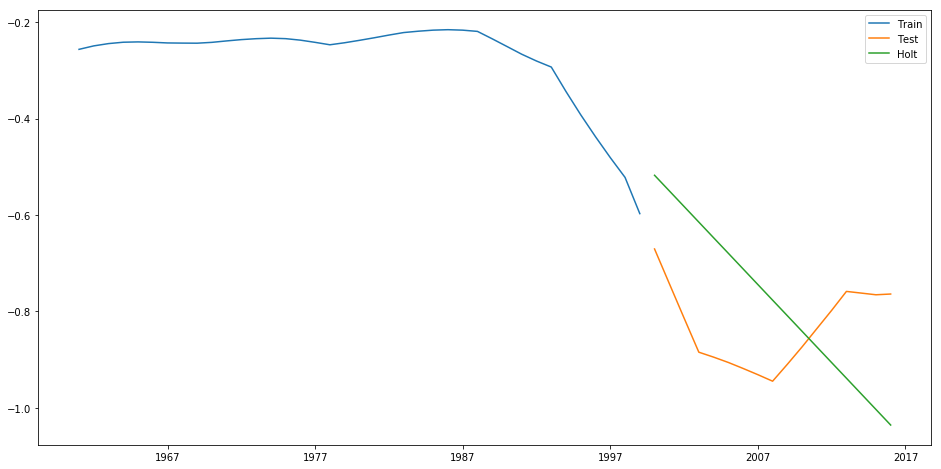

In [150]:
# Model with minimum MAPE
model = Holt(np.asarray(train['Positive Indicators']))
model_fit = model.fit(smoothing_level =0.2,smoothing_slope = 0.2,optimized=False)
fcst_Holt = test.copy()
fcst_Holt['Holt'] = model_fit.forecast(len(test['Positive Indicators']))


plt.figure(figsize=(16,8))
plt.plot(train['Positive Indicators'], label='Train')
plt.plot(test['Positive Indicators'], label='Test')
plt.plot(fcst_Holt['Holt'], label='Holt')
plt.legend(loc='best')


# Forecasting the Positive Indicators for 2016-2020

In [151]:
## Future Forecast with full data for India
model = Holt(np.asarray(df['Positive Indicators']))
model_fit = model.fit(smoothing_level =0.2,smoothing_slope = 0.2,optimized=False)


fct=model_fit.forecast(5)
print("The forcasted value for 5 years is:\n\n",fct)

The forcasted value for 5 years is:

 [-0.84427325 -0.82909736 -0.81392147 -0.79874558 -0.78356969]


In [152]:
# Creating new dataframe to combine both old data and new forecasted data
old=pd.DataFrame({'Time':df.Year,'Postive Indicator':df['Positive Indicators']})
time=pd.date_range(start='1/1/2016',end='31/12/2020',freq='y')
print(time)
new_time=[2016,2017,2018,2019,2020]
new=pd.DataFrame({'Time':new_time,'Postive Indicator':fct})
new.index=time
print(old.shape)
print(new.shape)

final=pd.DataFrame(pd.concat([old,new],axis=0))
final.head()

DatetimeIndex(['2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')
(56, 2)
(5, 2)


,Time,Postive Indicator
1960-12-31,1960,-0.256328
1961-12-31,1961,-0.249166
1962-12-31,1962,-0.244403
1963-12-31,1963,-0.241572
1964-12-31,1964,-0.240906


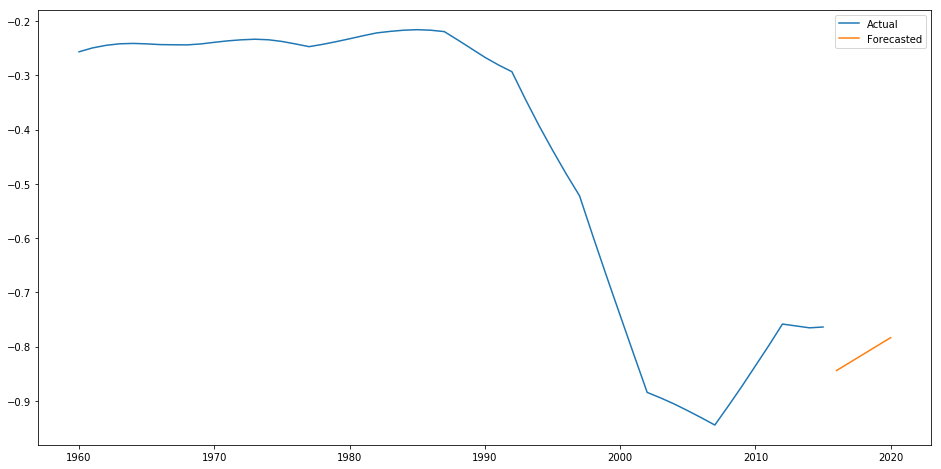

In [153]:
# Forecasted plot for India Positive Indicator
plt.figure(figsize=(16,8))
plt.plot(old.Time,old['Postive Indicator'],label='Actual')
plt.plot(new.Time,new['Postive Indicator'],label='Forecasted')
plt.legend(loc='best')

# ARIMA

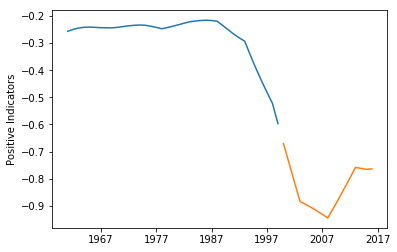

In [154]:
#Creating train and test set 
train=df[0:int(len(df)*0.7)] 
test=df[int(len(df)*0.7):]

type(train)
train.head()

# SImple Plot of Test and train data
sns.lineplot(train.index,train['Positive Indicators'],ci=None)
sns.lineplot(test.index,test['Positive Indicators'],ci=None)
plt.show()



In [155]:
ts=df['Positive Indicators'] 

C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array inde

Text(0.5,1,'RSS: nan')

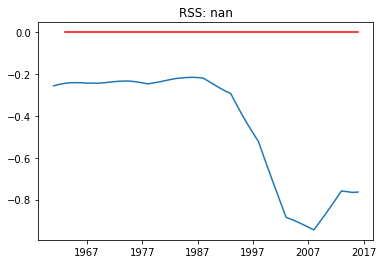

In [156]:
# ARIMA model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts, order=(0, 2, 0)) 
results_ARIMA = model.fit()  
plt.plot(ts)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts)**2))

In [157]:
# ARIMA model summary
results_ARIMA.summary()

C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array inde

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARIMA Model Results                                
==================================================================================
Dep. Variable:     D2.Positive Indicators   No. Observations:                   54
Model:                     ARIMA(0, 2, 0)   Log Likelihood                 153.153
Method:                               css   S.D. of innovations              0.014
Date:                    Mon, 01 Apr 2019   AIC                           -302.305
Time:                            21:41:29   BIC                           -298.327
Sample:                        12-31-1962   HQIC                          -300.771
                             - 12-31-2015                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.002     -0.054      0.957      -0.004       0.004
==============================================================================
"""

In [158]:
# Predicting the values for Training part

pred=results_ARIMA.predict()
print(len(pred))
df['Forecasted_Positive_Indicator']=pred
#df.drop('Forecasted',axis=1,inplace=True)
df

54


C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array inde

,Year,Country Name,Positive Indicators,Negative Indicators,Forecasted_Positive_Indicator
1960-12-31,1960,South Africa,-0.256328,0.956816,NaN
1961-12-31,1961,South Africa,-0.249166,0.964875,NaN
1962-12-31,1962,South Africa,-0.244403,0.969741,-0.000104
1963-12-31,1963,South Africa,-0.241572,0.968274,-0.000104
1964-12-31,1964,South Africa,-0.240906,0.964349,-0.000104
1965-12-31,1965,South Africa,-0.241709,0.958669,-0.000104
1966-12-31,1966,South Africa,-0.243062,0.952530,-0.000104
1967-12-31,1967,South Africa,-0.243390,0.946260,-0.000104
1968-12-31,1968,South Africa,-0.243574,0.964308,-0.000104
1969-12-31,1969,South Africa,-0.241842,0.982956,-0.000104


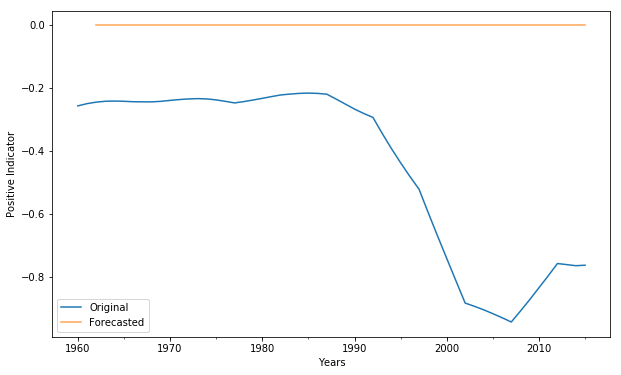

In [159]:
axis = df['Positive Indicators'].plot(label='Original', figsize=(10, 6))
#df['Positive Indicators'].plot(ax=axis, label='Test', alpha=0.7)
df['Forecasted_Positive_Indicator'].plot(ax=axis, label='Forecasted', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Positive Indicator')
plt.legend(loc='best')
plt.show()
plt.close()

In [160]:
forecast=results_ARIMA.forecast(steps=5,alpha=0.95)
LI=[]
UI=[]
for i in forecast[2]:
    LI.append(i[0])
    UI.append(i[1])

C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


In [161]:
df_new=pd.DataFrame({'Forecast 2016-2020':forecast[0],'Standard Error':forecast[1],'CI lower':LI,'CI Upper':UI})

time=pd.date_range(start='1/1/2016',end='31/12/2020',freq='y')
df_new.index=time
df_new

,Forecast 2016-2020,Standard Error,CI lower,CI Upper
2016-12-31,-0.762525,0.014192,-0.763415,-0.761635
2017-12-31,-0.761196,0.031734,-0.763186,-0.759206
2018-12-31,-0.759971,0.053101,-0.763300,-0.756641
2019-12-31,-0.758850,0.077731,-0.763724,-0.753975
2020-12-31,-0.757833,0.105249,-0.764433,-0.751233


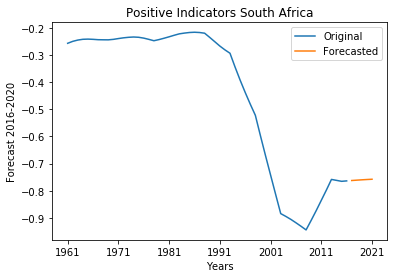

In [162]:
sns.lineplot(df.index,df['Positive Indicators'],ci=None,label='Original')
sns.lineplot(df_new.index,df_new['Forecast 2016-2020'],ci=None,label='Forecasted')
plt.title('Positive Indicators South Africa')
plt.xlabel('Years')
plt.legend()
plt.show()

# Model Evaluation

In [163]:
MAPE=[]
RMSE=[]
Acc=[]
# Simple Exponenetial model
mape=mean_absolute_percentage_error(test['Positive Indicators'],fcst_SES['test'])
MAPE.append(mape)
print('The MAPE value for SES model is :',mape)

rmse =np.sqrt(mean_squared_error(test['Positive Indicators'],fcst_SES['test']))
RMSE.append(rmse)
print('The RMSE score for SES model is:',rmse)


# Double Exponenetial model
mape=mean_absolute_percentage_error(test['Positive Indicators'],fcst_Holt['Holt'] )
MAPE.append(mape)
print('The MAPE value for DES model is :',mape)

rmse =np.sqrt(mean_squared_error(test['Positive Indicators'],fcst_Holt['Holt']))
RMSE.append(rmse)
print('The RMSE score for DES model is:',rmse)


# ARIMA
# Compute the root mean square error
from sklearn.metrics import  accuracy_score
mape=mean_absolute_percentage_error(df['Positive Indicators'][2:],df['Forecasted_Positive_Indicator'][2:])
MAPE.append(mape)
print('The MAPE value for ARIMA model is :',mape)
mse = ((df['Positive Indicators'] - df['Forecasted_Positive_Indicator']) ** 2).mean()
rmse = np.sqrt(mse)
RMSE.append(rmse)
print('The Root Mean Squared Error of ARIMA model  is {}'.format(round(rmse, 3)))



The MAPE value for SES model is : 27.706911460591304
The RMSE score for SES model is: 0.24924954856932902
The MAPE value for DES model is : 21.84507000496398
The RMSE score for DES model is: 0.19344073292893854
The MAPE value for ARIMA model is : 99.96832913615629
The Root Mean Squared Error of ARIMA model  is 0.527


In [164]:
Country=['South Africa','South Africa','South Africa']
Models=['SES','DES','ARIMA']
Indicators=['Positive Indicators','Positive Indicators','Positive Indicators']

Eval_Metrices_SouthAfrica_Pos=pd.DataFrame({'Country Name':Country,'Model Name':Models,'Indicator Name':Indicators,'Test MAPE':MAPE,'Test RMSE':RMSE,
                                })
Eval_Metrices_SouthAfrica_Pos

,Country Name,Model Name,Indicator Name,Test MAPE,Test RMSE
0,South Africa,SES,Positive Indicators,27.706911,0.249250
1,South Africa,DES,Positive Indicators,21.845070,0.193441
2,South Africa,ARIMA,Positive Indicators,99.968329,0.527444


# Negative Indicator

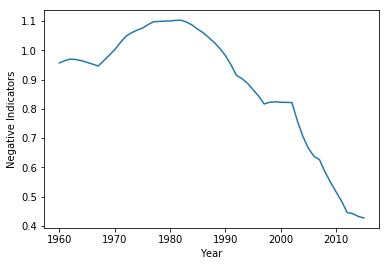

In [165]:
sns.lineplot(df['Year'],df['Negative Indicators'],ci=None)
plt.show()

# Splitting data into train and test

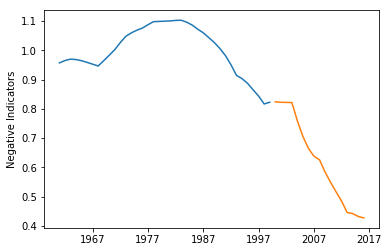

In [166]:
#Creating train and test set 
train=df[0:int(len(df)*0.7)] 
test=df[int(len(df)*0.7):]

type(train)
train.head()

# SImple Plot of Test and train data
sns.lineplot(train.index,train['Negative Indicators'],ci=None)
sns.lineplot(test.index,test['Negative Indicators'],ci=None)
plt.show()


# Decomposition Models

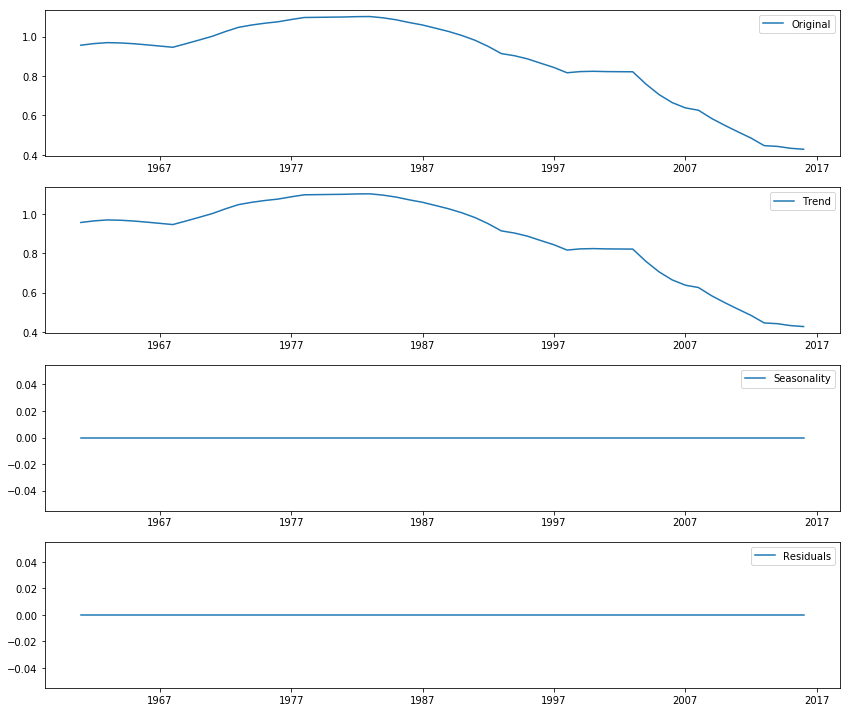

In [167]:
ts=df['Negative Indicators']
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=[12,10])
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Simple Exponential Smoothing

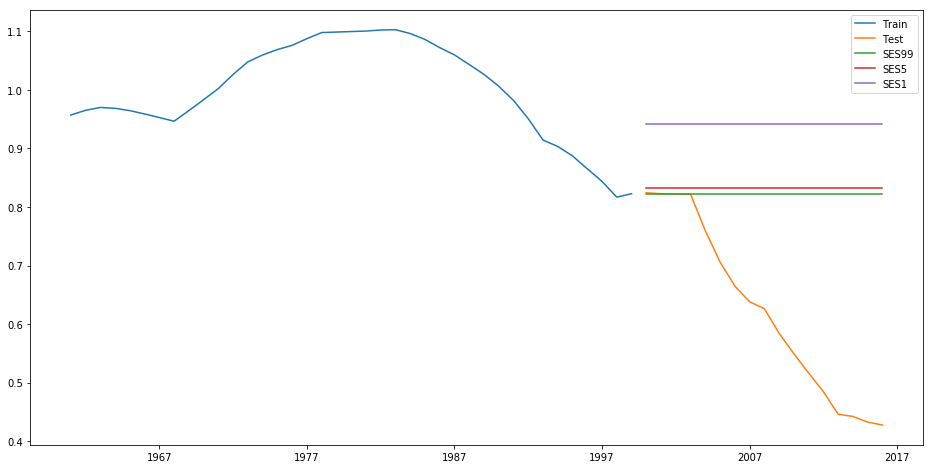

In [168]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

# create class
model = SimpleExpSmoothing(np.asarray(train['Negative Indicators']))

# fit model
model99_fit = model.fit(smoothing_level=0.99,optimized=False)
model5_fit = model.fit(smoothing_level=0.5,optimized=False)
model1_fit = model.fit(smoothing_level=0.1,optimized=False)

fcst_SES = test.copy()

fcst_SES['SES99'] = model99_fit.forecast(len(test['Negative Indicators']))
fcst_SES['SES5'] = model5_fit.forecast(len(test['Negative Indicators']))
fcst_SES['SES1'] = model1_fit.forecast(len(test['Negative Indicators']))

plt.figure(figsize=(16,8))
plt.plot(train['Negative Indicators'], label='Train')
plt.plot(test['Negative Indicators'], label='Test')
plt.plot(fcst_SES['SES99'], label='SES99')
plt.plot(fcst_SES['SES5'], label='SES5')
plt.plot(fcst_SES['SES1'], label='SES1')
plt.legend(loc='best')


In [169]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Optimum Parameter Model

In [170]:

from sklearn.metrics import mean_squared_error
mape=mean_absolute_percentage_error(test['Negative Indicators'],fcst_SES['SES99'])
print('The MAPE value for base model is :',mape)

rmse =np.sqrt(mean_squared_error(test['Negative Indicators'],fcst_SES['SES99']))
print('The RMSE score for base model is:',rmse)

model_opt_fit = model.fit()

model_opt_fit.model.params



The MAPE value for base model is : 40.08354837353197
The RMSE score for base model is: 0.24833443665726201


{'smoothing_level': 1.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 0.956815585,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

The MAPE value for base model is : 40.092437909144806
The RMSE score for base model is: 0.24838053401554433


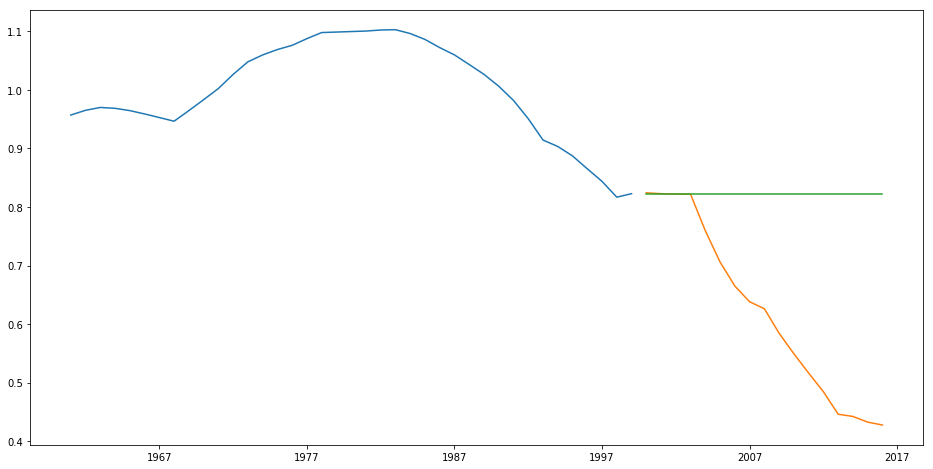

In [171]:
# create class
model = SimpleExpSmoothing(np.asarray(train['Negative Indicators']))

# fit model
model99_fit = model.fit(smoothing_level=1,optimized=False)
fcst_SES = test.copy()
fcst_SES['test_1'] = model99_fit.forecast(len(test['Negative Indicators']))

mape=mean_absolute_percentage_error(test['Negative Indicators'],fcst_SES['test_1'])
print('The MAPE value for base model is :',mape)

rmse =np.sqrt(mean_squared_error(test['Negative Indicators'],fcst_SES['test_1']))
print('The RMSE score for base model is:',rmse)



plt.figure(figsize=(16,8))
plt.plot(train['Negative Indicators'], label='Train')
plt.plot(test['Negative Indicators'], label='Test')
plt.plot(fcst_SES['test_1'], label='Test Forecasted')

# Double Exponential (Holt)

In [172]:
model = Holt(np.asarray(train['Negative Indicators']))
model_fit = model.fit(smoothing_level = 0.9,smoothing_slope = 0.3,optimized=False)
fcst_Holt = test.copy()
fcst_Holt['Holt_1'] = model_fit.forecast(len(test['Negative Indicators']))


In [173]:
model_fit.fittedvalues

array([0.96487455, 0.96350453, 0.9709905 , 0.97578163, 0.9729134 ,
       0.96678107, 0.95886542, 0.95083859, 0.94315705, 0.96434217,
       0.98826981, 1.01151862, 1.03941612, 1.06381406, 1.0756361 ,
       1.08316783, 1.08841444, 1.09889381, 1.10890699, 1.10785465,
       1.10623329, 1.10517943, 1.10578547, 1.10545345, 1.096936  ,
       1.08404622, 1.06687923, 1.05199828, 1.0332743 , 1.01440889,
       0.99200097, 0.96519439, 0.93051372, 0.88977781, 0.87947069,
       0.86596172, 0.84459427, 0.82281534, 0.79474197])

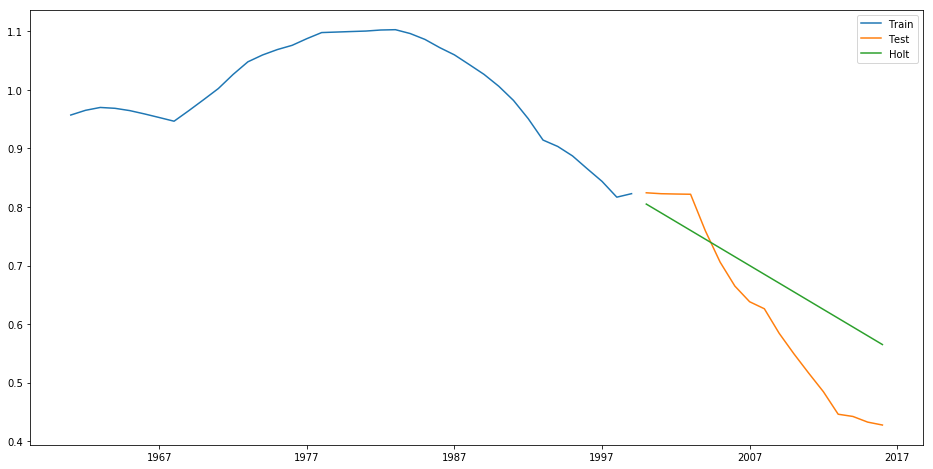

In [174]:
plt.figure(figsize=(16,8))
plt.plot(train['Negative Indicators'], label='Train')
plt.plot(test['Negative Indicators'], label='Test')
plt.plot(fcst_Holt['Holt_1'], label='Holt')
plt.legend(loc='best')

In [175]:
## New alpha and Beta values

MAPE=[]
a=[]
b=[]
for i in np.arange(0,1,0.1):
    for j in np.arange(0,1,0.1):
        model = Holt(np.asarray(train['Negative Indicators']))
        modelopt_fit=model.fit(smoothing_level=i,smoothing_slope=j)
        fcst_Holt['Opt2'] = modelopt_fit.forecast(len(test['Negative Indicators']))#70-30
        a.append(i)
        b.append(j)
        MAPE.append(mean_absolute_percentage_error(test['Negative Indicators'],fcst_Holt['Opt2'] ))
d=pd.DataFrame({'Alpha':a,'Beta':b,'MAPE':MAPE})


m=d.MAPE.min()
d[d.MAPE==m]

,Alpha,Beta,MAPE
22,0.2,0.2,4.90202


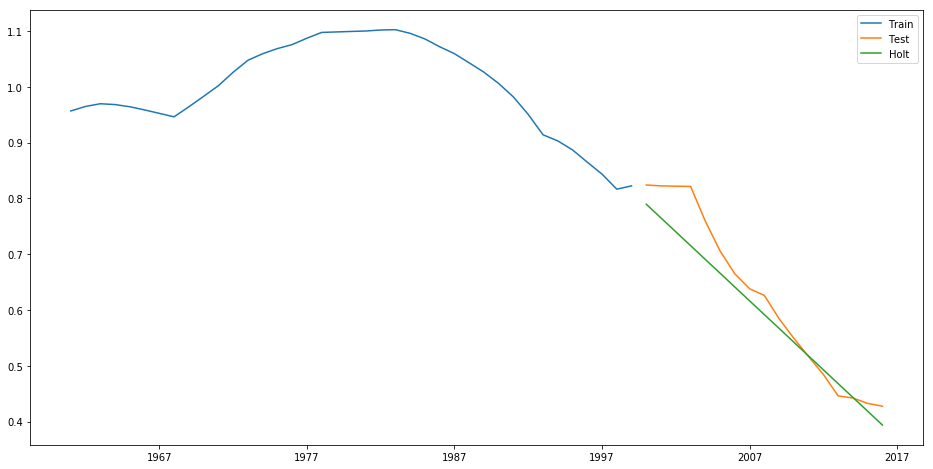

In [176]:
# Model with minimum MAPE
model = Holt(np.asarray(train['Negative Indicators']))
model_fit = model.fit(smoothing_level =0.2,smoothing_slope = 0.2,optimized=False)
fcst_Holt = test.copy()
fcst_Holt['Holt_1'] = model_fit.forecast(len(test['Negative Indicators']))


plt.figure(figsize=(16,8))
plt.plot(train['Negative Indicators'], label='Train')
plt.plot(test['Negative Indicators'], label='Test')
plt.plot(fcst_Holt['Holt_1'], label='Holt')
plt.legend(loc='best')


# Forecasting the negative indicators for 2016-2020

In [177]:
## Future Forecast with full data for United States
model = Holt(np.asarray(df['Negative Indicators']))
model_fit = model.fit(smoothing_level =0.2,smoothing_slope = 0.2,optimized=False)


fct=model_fit.forecast(5)
print("The forcasted value for 5 years is:\n\n",fct)

The forcasted value for 5 years is:

 [0.36833579 0.3397195  0.31110321 0.28248693 0.25387064]


In [178]:
# Creating new dataframe to combine both old data and new forecasted data
old=pd.DataFrame({'Time':df.Year,'Negative Indicator':df['Negative Indicators']})
time=pd.date_range(start='1/1/2016',end='31/12/2020',freq='y')
print(time)
new_time=[2016,2017,2018,2019,2020]
new=pd.DataFrame({'Time':new_time,'Negative Indicator':fct})
new.index=time
print(old.shape)
print(new.shape)

final=pd.DataFrame(pd.concat([old,new],axis=0))
final.head()

DatetimeIndex(['2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')
(56, 2)
(5, 2)


,Time,Negative Indicator
1960-12-31,1960,0.956816
1961-12-31,1961,0.964875
1962-12-31,1962,0.969741
1963-12-31,1963,0.968274
1964-12-31,1964,0.964349


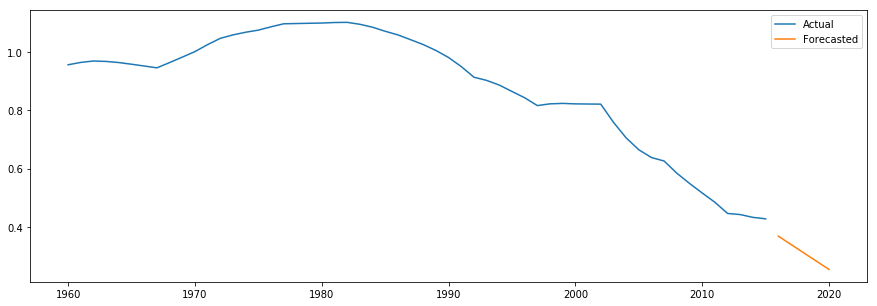

In [179]:
# Forecasted plot for India Negative Indicator
plt.figure(figsize=(15,5))
plt.plot(old.Time,old['Negative Indicator'],label='Actual')
plt.plot(new.Time,new['Negative Indicator'],label='Forecasted')
plt.legend(loc='best')

### ARIMA Model


In [180]:
ts=df['Negative Indicators']

C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array inde

Text(0.5,1,'RSS: 748.8605')

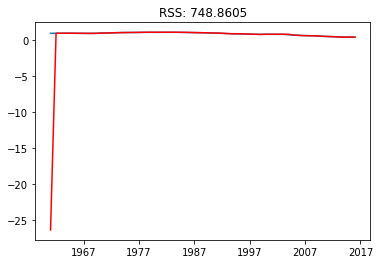

In [181]:
# ARIMA model
model = ARIMA(ts, order=(2, 0, 0)) 
results_ARIMA = model.fit()  
plt.plot(ts)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts)**2))

In [182]:
# ARIMA model summary
results_ARIMA.summary()

C:\Users\HII\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1455: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\HII\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\HII\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\HII\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                              
===============================================================================
Dep. Variable:     Negative Indicators   No. Observations:                   56
Model:                      ARMA(2, 0)   Log Likelihood                 157.119
Method:                        css-mle   S.D. of innovations              0.013
Date:                 Mon, 01 Apr 2019   AIC                           -306.239
Time:                         21:41:33   BIC                           -298.137
Sample:                     12-31-1960   HQIC                          -303.098
                          - 12-31-2015                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -26.4083        nan        nan        nan         nan         nan
ar.L1.Negative Indicators     1.8235        nan        nan        nan         nan         nan
ar.L2.Negative Indicators    -0.8235        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
AR.2            1.2143           +0.0000j            1.2143            0.0000
-----------------------------------------------------------------------------
"""

In [183]:
ts.head()

1960-12-31    0.956816
1961-12-31    0.964875
1962-12-31    0.969741
1963-12-31    0.968274
1964-12-31    0.964349
Freq: A-DEC, Name: Negative Indicators, dtype: float64

In [184]:
# Predicting the values for Training part
pred=results_ARIMA.predict()
print(len(pred))
df['Forecasted_Negative_Indicator']=pred
#df.drop('Forecasted',axis=1,inplace=True)
df

56


,Year,Country Name,Positive Indicators,Negative Indicators,Forecasted_Positive_Indicator,Forecasted_Negative_Indicator
1960-12-31,1960,South Africa,-0.256328,0.956816,NaN,-26.408340
1961-12-31,1961,South Africa,-0.249166,0.964875,NaN,0.956804
1962-12-31,1962,South Africa,-0.244403,0.969741,-0.000104,0.971491
1963-12-31,1963,South Africa,-0.241572,0.968274,-0.000104,0.973728
1964-12-31,1964,South Africa,-0.240906,0.964349,-0.000104,0.967046
1965-12-31,1965,South Africa,-0.241709,0.958669,-0.000104,0.961096
1966-12-31,1966,South Africa,-0.243062,0.952530,-0.000104,0.953971
1967-12-31,1967,South Africa,-0.243390,0.946260,-0.000104,0.947455
1968-12-31,1968,South Africa,-0.243574,0.964308,-0.000104,0.941077
1969-12-31,1969,South Africa,-0.241842,0.982956,-0.000104,0.979149


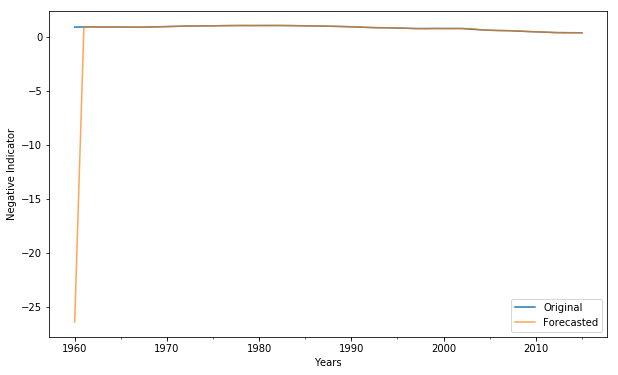

In [185]:
axis = df['Negative Indicators'].plot(label='Original', figsize=(10, 6))
#df['Positive Indicators'].plot(ax=axis, label='Test', alpha=0.7)
df['Forecasted_Negative_Indicator'].plot(ax=axis, label='Forecasted', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Negative Indicator')
plt.legend(loc='best')
plt.show()
plt.close()

In [186]:
forecast=results_ARIMA.forecast(steps=5,alpha=0.95)
LI=[]
UI=[]
for i in forecast[2]:
    LI.append(i[0])
    UI.append(i[1])

In [187]:
df_new=pd.DataFrame({'Forecast 2016-2020':forecast[0],'Standard Error':forecast[1],'CI lower':LI,'CI Upper':UI})

time=pd.date_range(start='1/1/2016',end='31/12/2020',freq='y')
df_new.index=time
df_new

,Forecast 2016-2020,Standard Error,CI lower,CI Upper
2016-12-31,0.423596,0.012650,0.422803,0.424389
2017-12-31,0.420178,0.026308,0.418529,0.421828
2018-12-31,0.417344,0.041152,0.414763,0.419925
2019-12-31,0.414990,0.056497,0.411447,0.418533
2020-12-31,0.413032,0.071934,0.408521,0.417543


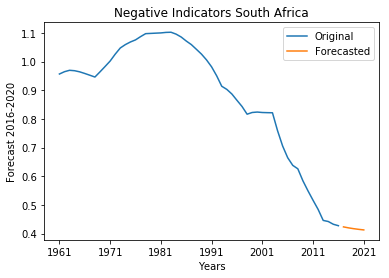

In [188]:
sns.lineplot(df.index,df['Negative Indicators'],ci=None,label='Original')
sns.lineplot(df_new.index,df_new['Forecast 2016-2020'],ci=None,label='Forecasted')
plt.title('Negative Indicators South Africa')
plt.xlabel('Years')
plt.legend()
plt.show()

# Model Evaluations

In [189]:
MAPE=[]
RMSE=[]
Acc=[]
# Simple Exponenetial model
mape=mean_absolute_percentage_error(test['Negative Indicators'],fcst_SES['test_1'])
MAPE.append(mape)
print('The MAPE value for SES model is :',mape)

rmse =np.sqrt(mean_squared_error(test['Negative Indicators'],fcst_SES['test_1']))
RMSE.append(rmse)
print('The RMSE score for SES model is:',rmse)


# Double Exponenetial model
mape=mean_absolute_percentage_error(test['Negative Indicators'],fcst_Holt['Holt_1'] )
MAPE.append(mape)
print('The MAPE value for DES model is :',mape)

rmse =np.sqrt(mean_squared_error(test['Negative Indicators'],fcst_Holt['Holt_1']))
RMSE.append(rmse)
print('The RMSE score for DES model is:',rmse)

# ARIMA
# Compute the root mean square error
from sklearn.metrics import  accuracy_score
mape=mean_absolute_percentage_error(df['Negative Indicators'],df['Forecasted_Negative_Indicator'])
MAPE.append(mape)
print('The MAPE value for ARIMA model is :',mape)
mse = ((df['Negative Indicators'] - df['Forecasted_Negative_Indicator']) ** 2).mean()
rmse = np.sqrt(mse)
RMSE.append(rmse)
print('The Root Mean Squared Error of ARIMA model  is {}'.format(round(rmse, 3)))


The MAPE value for SES model is : 40.092437909144806
The RMSE score for SES model is: 0.24838053401554433
The MAPE value for DES model is : 4.920446286240155
The RMSE score for DES model is: 0.04420256239428844
The MAPE value for ARIMA model is : 52.053172736216716
The Root Mean Squared Error of ARIMA model  is 3.657


In [191]:
Country=['South Africa','South Africa','South Africa']
Models=['SES','DES','ARIMA']
Indicators=['Negative Indicators','Negative Indicators','Negative Indicators']

Eval_Metrices_SouthAfrica_Neg=pd.DataFrame({'Country Name':Country,'Model Name':Models,'Indicator Name':Indicators,'Test MAPE':MAPE,'Test RMSE':RMSE,
                                 })
Eval_Metrices_SouthAfrica_Neg

,Country Name,Model Name,Indicator Name,Test MAPE,Test RMSE
0,South Africa,SES,Negative Indicators,40.092438,0.248381
1,South Africa,DES,Negative Indicators,4.920446,0.044203
2,South Africa,ARIMA,Negative Indicators,52.053173,3.656844


In [192]:
Eval_Metrices_SouthAfrica=pd.concat([Eval_Metrices_SouthAfrica_Pos,Eval_Metrices_SouthAfrica_Neg],axis=0)
Eval_Metrices_SouthAfrica

,Country Name,Model Name,Indicator Name,Test MAPE,Test RMSE
0,South Africa,SES,Positive Indicators,27.706911,0.249250
1,South Africa,DES,Positive Indicators,21.845070,0.193441
2,South Africa,ARIMA,Positive Indicators,99.968329,0.527444
0,South Africa,SES,Negative Indicators,40.092438,0.248381
1,South Africa,DES,Negative Indicators,4.920446,0.044203
2,South Africa,ARIMA,Negative Indicators,52.053173,3.656844


In [193]:
Eval_Metrices_SouthAfrica.to_csv('Model_SA.csv',index=False)